# Capstone project - HealthCare Fraud Detection - EDA and Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cp_clean_helper import show_values
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading datasets and looking at shapes:-

In [2]:
# Loading datasets

train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
fraud_labels = pd.read_csv("Data/Train-1542865627584.csv")

# Looking at dataset shapes

print('Shape of fraud labels data :',fraud_labels.shape)
print('Shape of train data :',train_df.shape)
print('Shape of test data :',test_df.shape)

Shape of fraud labels data : (5410, 2)
Shape of train data : (558211, 61)
Shape of test data : (135392, 60)


### # Looking at first few rows for each:

In [3]:
train_df.head(5)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Diag_Code_Cnt,Proc_Code_Cnt,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count,PotentialFraud
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,0,66,36060,3264,1943,1,1,CLM46614,PRV55912,26000,53276,0,0,3022,1068.0,154,1036,1770,2273,2981,538,2034,442,197,1357,1041,1117,300,154,36,3,6,6,2009,4,96.05,27068.0,3,1,1,4,Yes
1,BENE12511,0,0,0,39,510,12,12,1,1,1,1,1,1,0,0,0,1,1,0,65,1250,1250,1944,9,1,CLM724430,PRV55912,600,73124,0,0,3763,0.0,736,10069,4945,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,-1,0,2009,12,100.00,600.0,21,2,2,8,Yes
2,BENE14577,1,0,1,33,70,12,12,1,0,0,1,1,1,1,0,1,1,0,0,74,2390,2390,1935,10,1,CLM567180,PRV55912,20,47058,0,0,3763,0.0,736,202,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,-1,0,2009,9,100.00,20.0,6,2,2,8,Yes
3,BENE15074,1,0,0,39,470,12,12,0,1,0,1,1,1,0,0,1,1,1,0,77,870,870,1932,6,1,CLM259984,PRV55912,30,40279,0,31218,3763,0.0,736,10379,1781,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,-1,0,2009,3,100.00,30.0,12,1,1,7,Yes
4,BENE16973,0,0,0,39,310,12,12,0,0,0,1,1,1,1,0,1,1,1,0,77,24450,2586,1932,5,1,CLM565430,PRV55912,50,36530,4694,0,3763,0.0,736,10274,2335,3352,1507,3351,2402,2443,304,1629,1041,1117,300,154,0,0,-1,0,2009,9,100.00,50.0,3,3,2,7,Yes


In [4]:
test_df.head(5)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Diag_Code_Cnt,Proc_Code_Cnt,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,0,66,36060,3264,1943,1,1,CLM392397,PRV55962,30,6381,0,3608,2418,0.0,712,8039,3452,417,605,2378,692,1690,1566,1383,435,659,170,68,544,0,-1,0,2009,6,100.0,30.0,3,1,1,4
1,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,0,66,36060,3264,1943,1,1,CLM430760,PRV56112,30,12407,0,6949,2418,0.0,712,7178,3082,995,2453,2155,1895,1690,1566,1383,435,659,170,68,286,0,-1,0,2009,6,100.0,30.0,3,1,1,4
2,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,1,69,1490,1490,1940,9,1,CLM233081,PRV56979,200,20041,0,11230,2418,0.0,712,5324,3154,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,105,0,-1,0,2009,3,100.0,200.0,3,1,1,6
3,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,1,69,1490,1490,1940,9,1,CLM496381,PRV56573,10,14401,2703,0,1408,0.0,712,4215,389,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,75,0,-1,0,2009,7,100.0,10.0,3,5,3,6
4,BENE11007,0,1,0,45,610,12,12,0,0,1,1,1,1,0,1,0,0,1,1,69,1490,1490,1940,9,1,CLM521391,PRV56573,10,18681,0,6974,2418,0.0,712,8153,3154,2802,2453,2155,1895,1690,1566,1383,435,659,170,68,509,0,-1,0,2009,8,100.0,10.0,3,1,1,6


In [5]:
fraud_labels.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


## # Additional EDA:

- Looking at percentages of fraud vs non-fraud providers in the training dataset

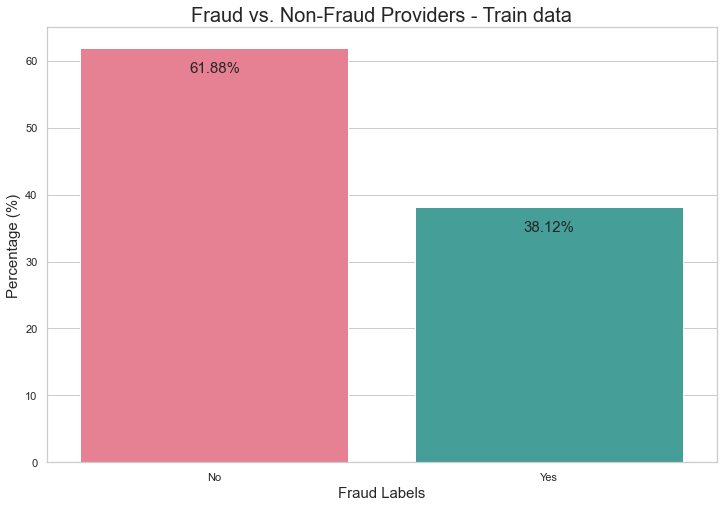

In [6]:
#  Creating df to show percentages of fraud vs non-fraud providers in the dataset:
fraud_df = pd.DataFrame(train_df['PotentialFraud'].value_counts(normalize=True)*100).reset_index()
fraud_df.columns=['Fraud_Labels', 'Per_data']

# Graphically presenting the results
plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Fraud_Labels", y="Per_data", data=fraud_df, palette='husl')
for p in splot.patches:
    splot.annotate(format(str(p.get_height().round(2)) + '%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Fraud Labels", fontsize = 15)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers - Train data", fontsize = 20)
plt.show()

## Beneficiary focused EDA:

### Looking at chronic conditions for inpatient and outpatient beneficiary claims:

In [7]:
# Creating inpatient subset

inp_df = train_df.loc[train_df.Hospital_Stay >= 0,:]

# Looking at mean and median

print(inp_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().mean())
print(inp_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().median())

Chr_Cond_Count    6.022788
dtype: float64
Chr_Cond_Count    6.0
dtype: float64


In [8]:
# Creating outpatient subset

out_df = train_df.loc[train_df.Hospital_Stay == -1,:]

# Looking at mean and median

print(out_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().mean())
print(out_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().median())

Chr_Cond_Count    7.415181
dtype: float64
Chr_Cond_Count    8.0
dtype: float64


- Looks like outpatient beneficiaries have slightly higher condition counts

<Figure size 720x720 with 0 Axes>

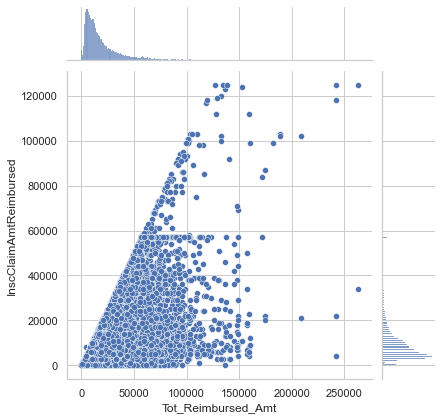

<Figure size 720x720 with 0 Axes>

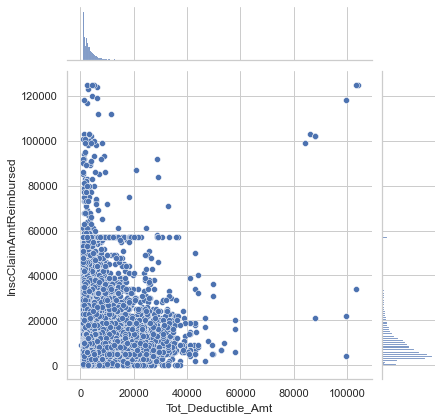

<Figure size 720x720 with 0 Axes>

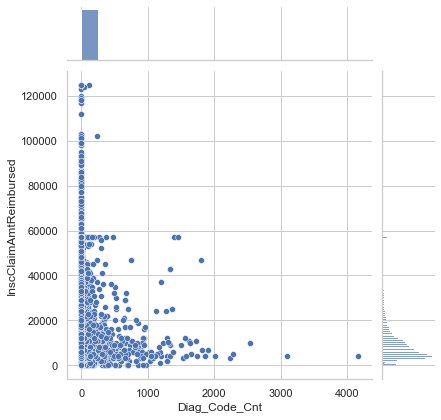

<Figure size 720x720 with 0 Axes>

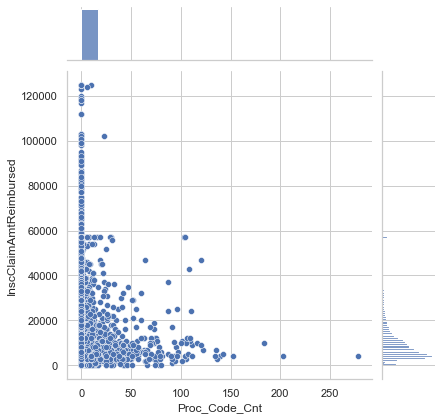

<Figure size 720x720 with 0 Axes>

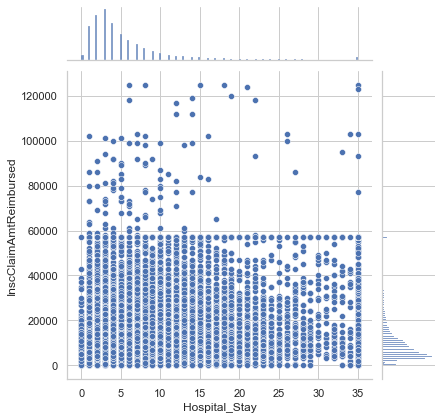

<Figure size 720x720 with 0 Axes>

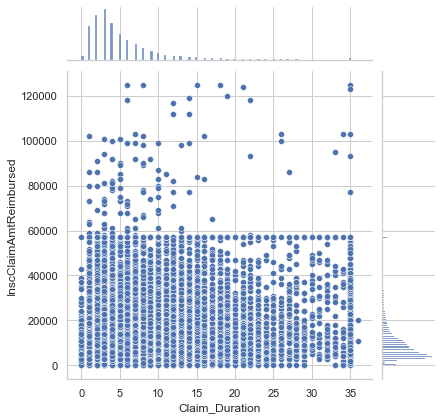

<Figure size 720x720 with 0 Axes>

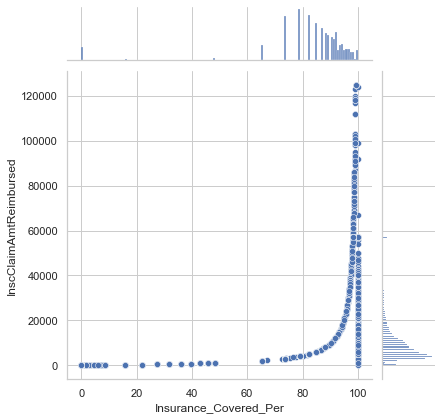

<Figure size 720x720 with 0 Axes>

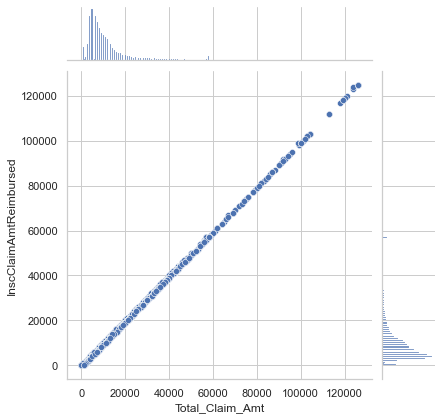

<Figure size 720x720 with 0 Axes>

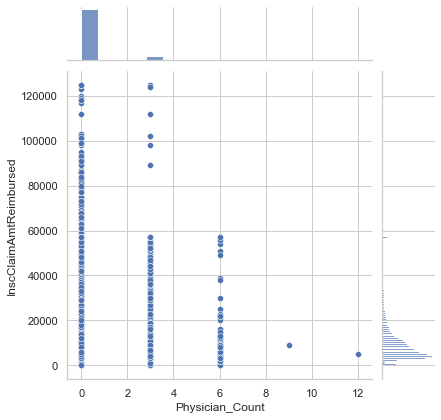

<Figure size 720x720 with 0 Axes>

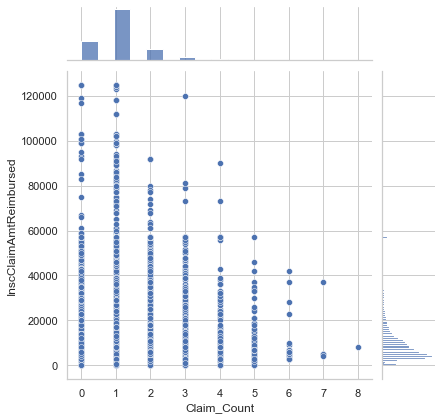

<Figure size 720x720 with 0 Axes>

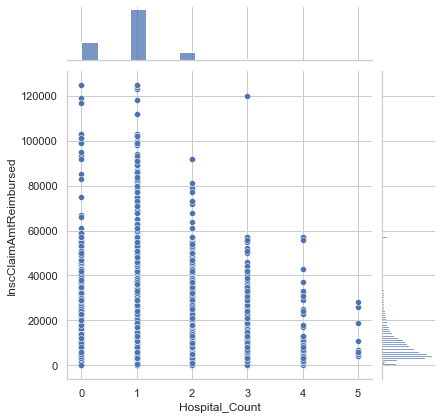

<Figure size 720x720 with 0 Axes>

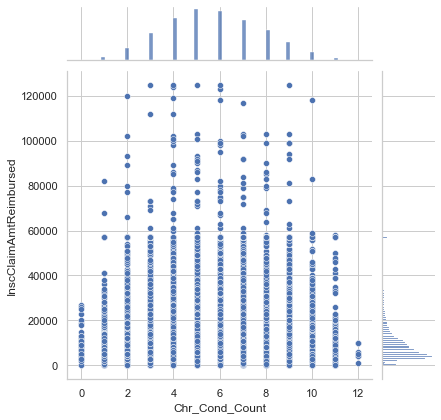

In [9]:
col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay',\
            'Claim_Duration', 'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count', 'Claim_Count',\
            'Hospital_Count', 'Chr_Cond_Count']

y = inp_df['InscClaimAmtReimbursed']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = inp_df[col]
    sns.jointplot(x=x, y=y, data=inp_df)

<Figure size 720x720 with 0 Axes>

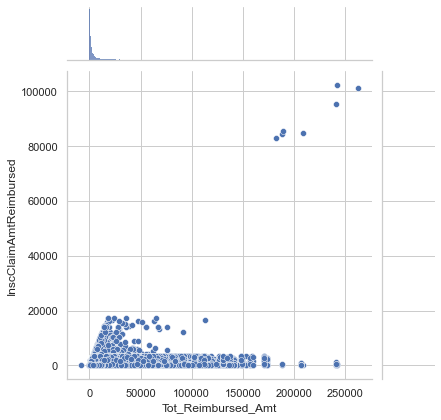

<Figure size 720x720 with 0 Axes>

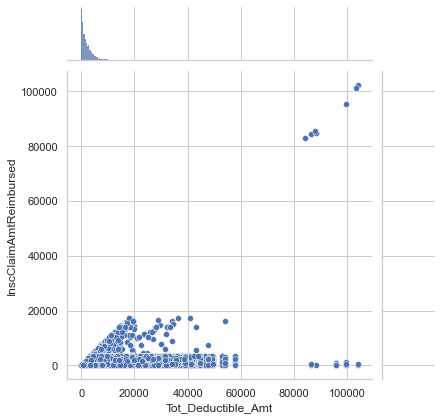

<Figure size 720x720 with 0 Axes>

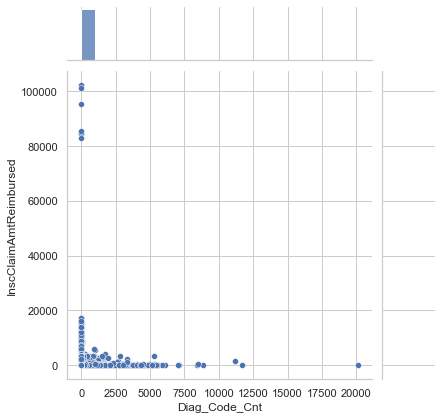

<Figure size 720x720 with 0 Axes>

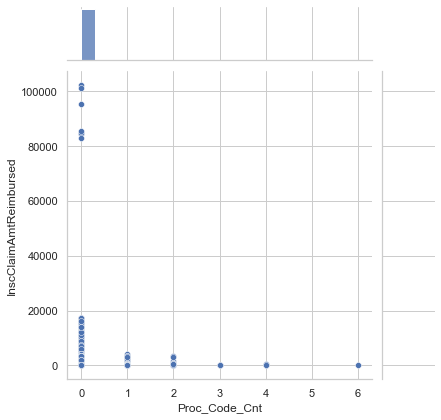

<Figure size 720x720 with 0 Axes>

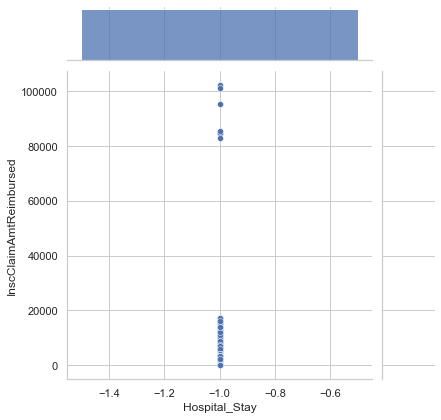

<Figure size 720x720 with 0 Axes>

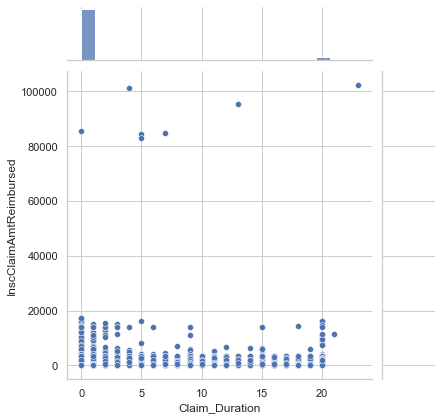

<Figure size 720x720 with 0 Axes>

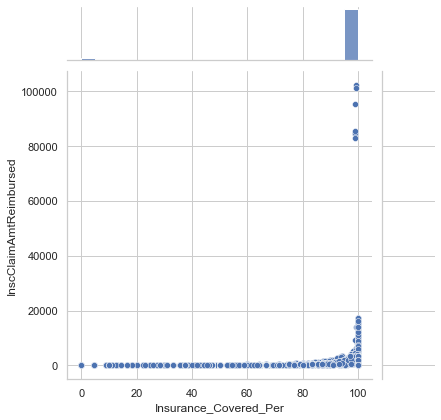

<Figure size 720x720 with 0 Axes>

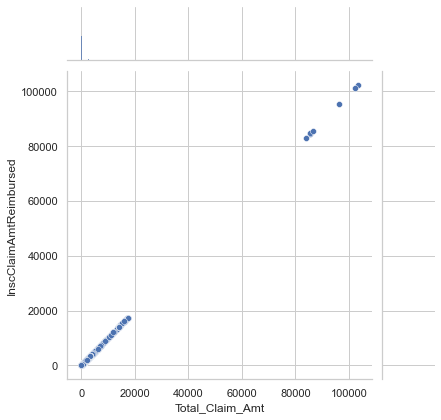

<Figure size 720x720 with 0 Axes>

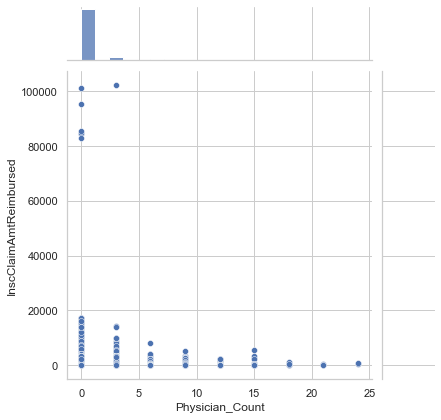

<Figure size 720x720 with 0 Axes>

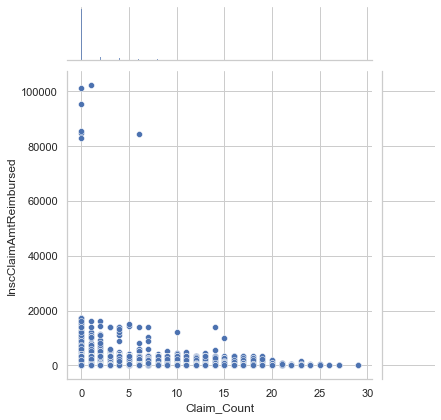

<Figure size 720x720 with 0 Axes>

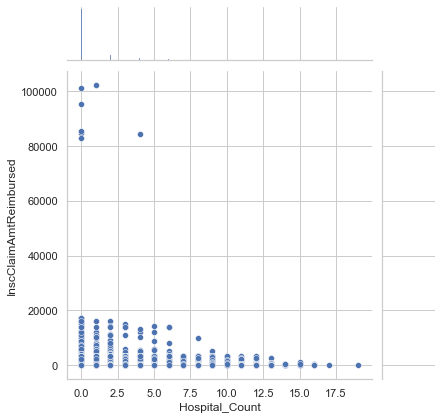

<Figure size 720x720 with 0 Axes>

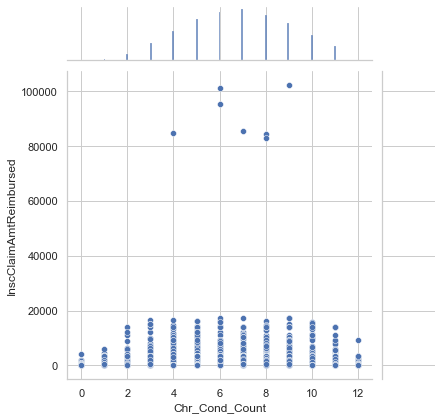

In [10]:
col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay',\
            'Claim_Duration', 'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count', 'Claim_Count',\
            'Hospital_Count', 'Chr_Cond_Count']

y = out_df['InscClaimAmtReimbursed']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = out_df[col]
    sns.jointplot(x=x, y=y, data=out_df)

### Looking at claim counts and chronic conditions per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No of Inpatient Claims vs Number of Chronic Conditions')

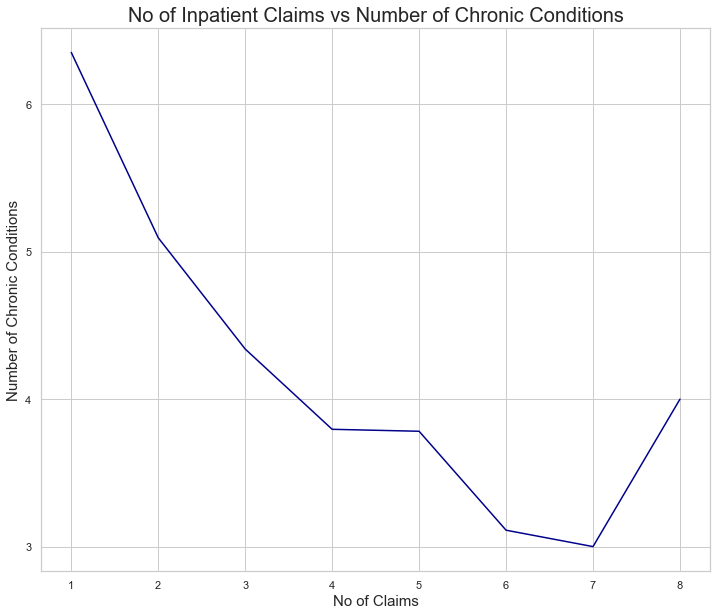

In [11]:
# Create df to show mean condition count per number of claims the patient has

inp_clm_chr = inp_df[['BeneID','ClaimID','Chr_Cond_Count']]\
              .groupby('BeneID').agg(['count','mean'])
inp_clm_chr.columns =['No_of_Claims', 'Chr_Cond_Cnt']
inp_clm_chr = inp_clm_chr.sort_values(by=['No_of_Claims',\
                            'Chr_Cond_Cnt']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.yticks(np.arange(3, 7, 1))
plt.xlabel("No of Claims", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No of Inpatient Claims vs Number of Chronic Conditions", fontsize = 20)

Text(0.5, 1.0, 'No of Outpatient Claims vs Number of Chronic Conditions')

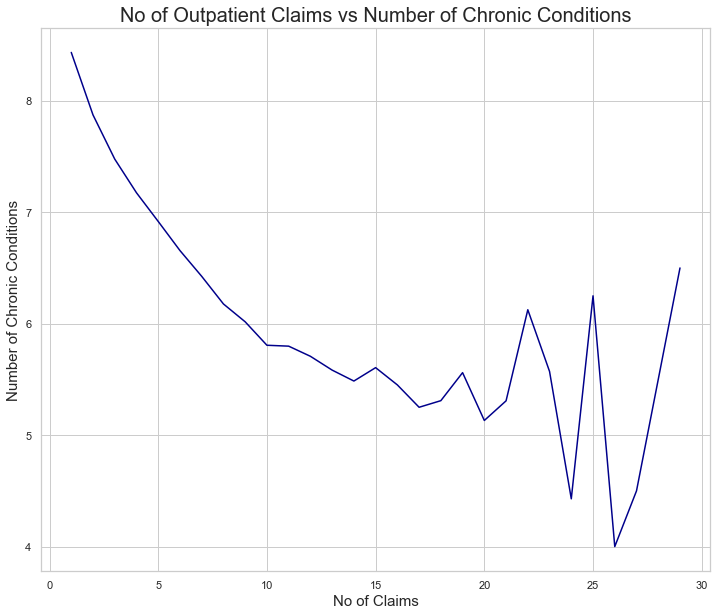

In [12]:
# Create df to show mean condition count per number of claims the patient has

out_clm_chr = out_df[['BeneID','ClaimID','Chr_Cond_Count']]\
              .groupby('BeneID').agg(['count','mean'])
out_clm_chr.columns =['No_of_Claims', 'Chr_Cond_Cnt']
out_clm_chr = out_clm_chr.sort_values(by=['No_of_Claims',\
                            'Chr_Cond_Cnt']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.xlabel("No of Claims", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No of Outpatient Claims vs Number of Chronic Conditions", fontsize = 20)

### Looking at patient age and claim counts per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No of Inpatient Claims vs Patient Age')

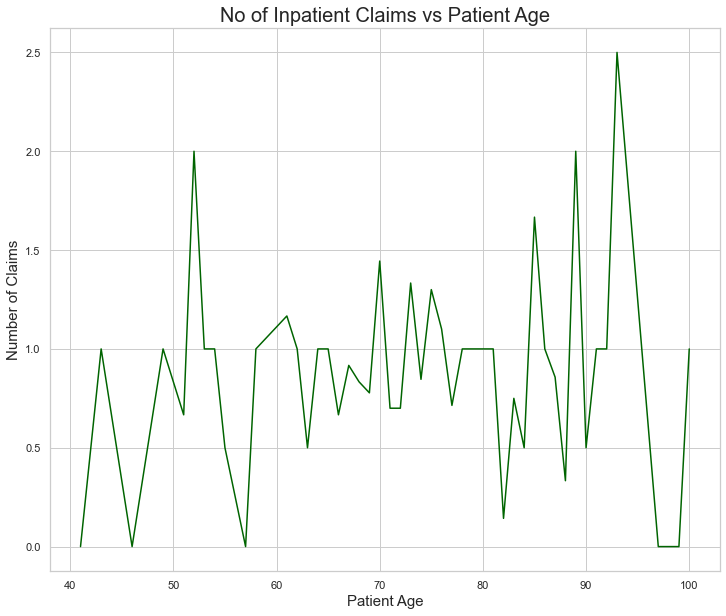

In [13]:
# Create df to show mean claims count per patient age group

inp_age_clm_df = inp_df.loc[inp_df.Deceased == 1,:][['BeneID','Age','Claim_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
inp_age_clm_df.columns =['Age','A','B','Claims_Count']
inp_age_clm_df.drop(columns=['A', 'B'], axis=1,inplace=True)
inp_age_clm_df['Claims_Count'] = inp_age_clm_df['Claims_Count'].astype(int)
inp_age_clm_df = inp_age_clm_df.sort_values(by=['Age','Claims_Count']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("Patient Age", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("No of Inpatient Claims vs Patient Age", fontsize = 20)

Text(0.5, 1.0, 'No of Inpatient Claims vs Patient Age')

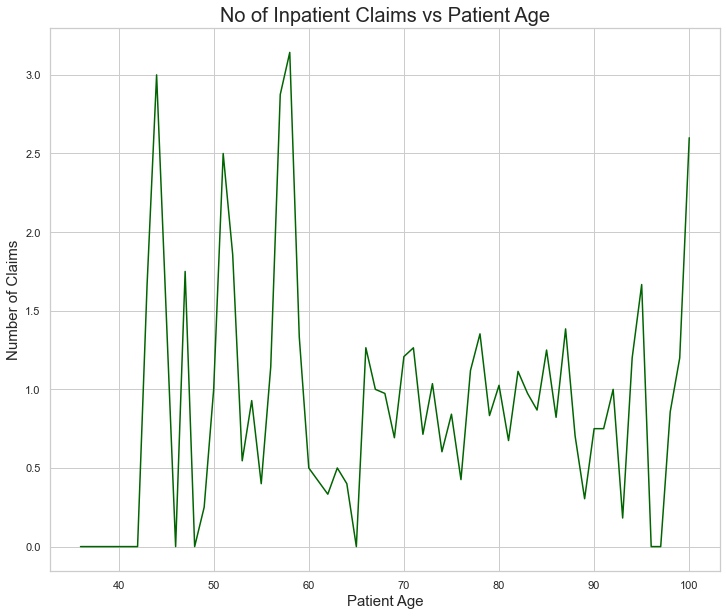

In [14]:
# Create df to show mean claims count per patient age group

out_age_clm_df = out_df.loc[out_df.Deceased == 1,:][['BeneID','Age','Claim_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
out_age_clm_df.columns =['Age','A','B','Claims_Count']
out_age_clm_df.drop(columns=['A', 'B'], axis=1,inplace=True)
out_age_clm_df['Claims_Count'] = out_age_clm_df['Claims_Count'].astype(int)
out_age_clm_df = out_age_clm_df.sort_values(by=['Claims_Count','Age']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')
plt.xlabel("Patient Age", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("No of Inpatient Claims vs Patient Age", fontsize = 20)

### Looking at patient age and chronic condition counts per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age')

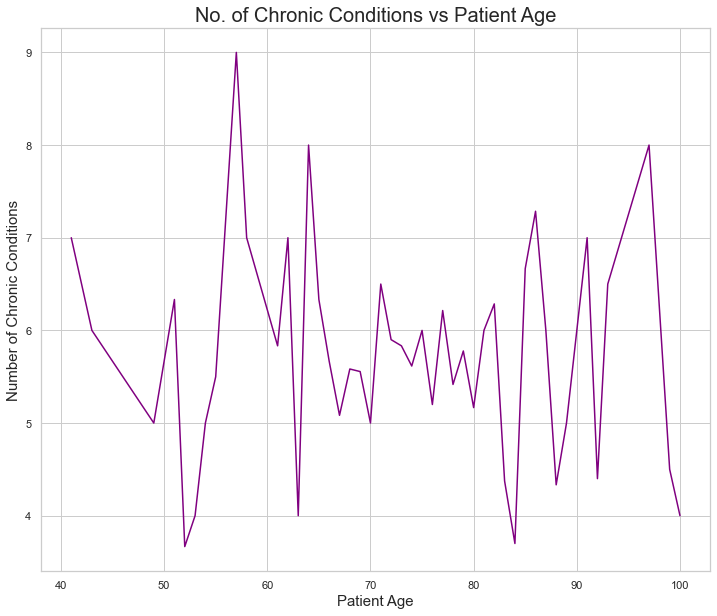

In [15]:
# Create df to show mean chronic condition count per patient age group

inp_age_chr_df = inp_df.loc[inp_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
inp_age_chr_df.columns =['Age','A','B','Condition_Count']
inp_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
inp_age_chr_df['Condition_Count'] = inp_age_chr_df['Condition_Count'].astype(int)
inp_age_chr_df = inp_age_chr_df.sort_values(by=['Age','Condition_Count']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age", fontsize = 20)

Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age')

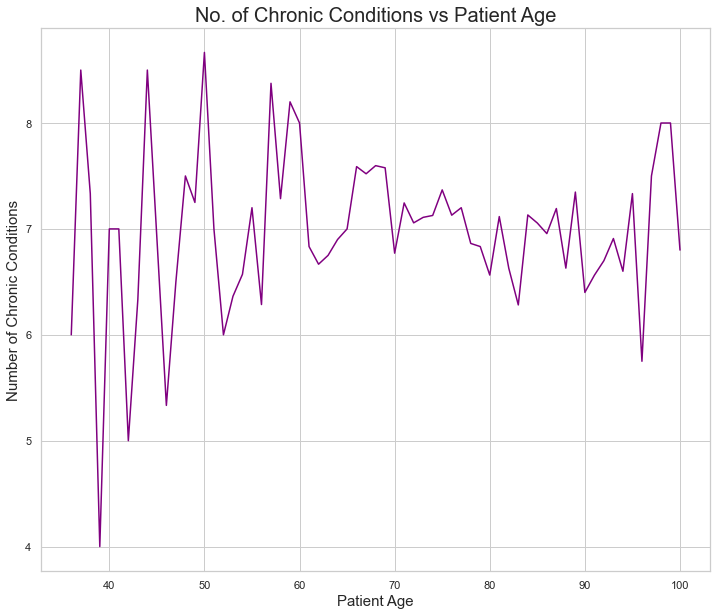

In [16]:
# Create df to show mean chronic condition count per patient age group

out_age_chr_df = out_df.loc[out_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
out_age_chr_df.columns =['Age','A','B','Condition_Count']
out_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
out_age_chr_df['Condition_Count'] = out_age_chr_df['Condition_Count'].astype(int)
out_age_chr_df = out_age_chr_df.sort_values(by=['Age','Condition_Count',]\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age", fontsize = 20)

## Provider fraud focused EDA

### Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

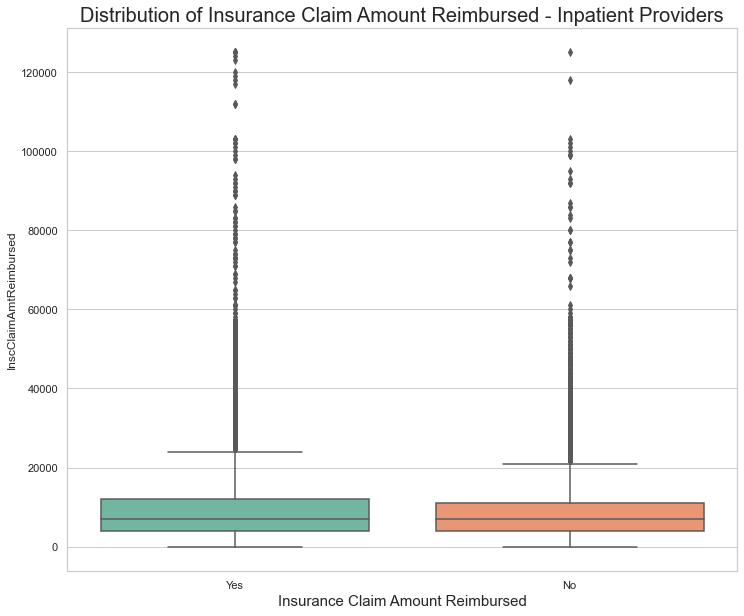

In [17]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="InscClaimAmtReimbursed", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'InscClaimAmtReimbursed',\
            palette='Set2')
plt.xlabel("Insurance Claim Amount Reimbursed", fontsize = 15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Inpatient Providers", fontsize = 20)
plt.show()

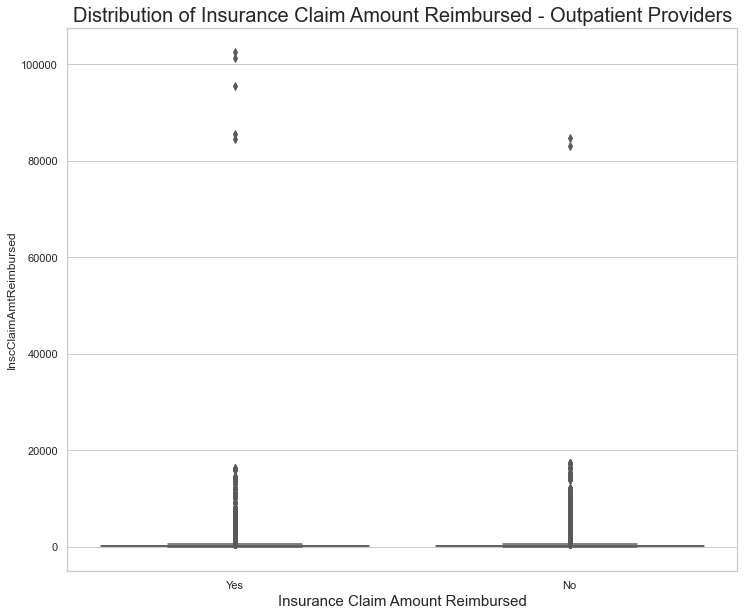

In [18]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="InscClaimAmtReimbursed", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'InscClaimAmtReimbursed',\
            palette='Set2')
plt.xlabel("Insurance Claim Amount Reimbursed", fontsize = 15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Outpatient Providers", fontsize = 20)
plt.show()

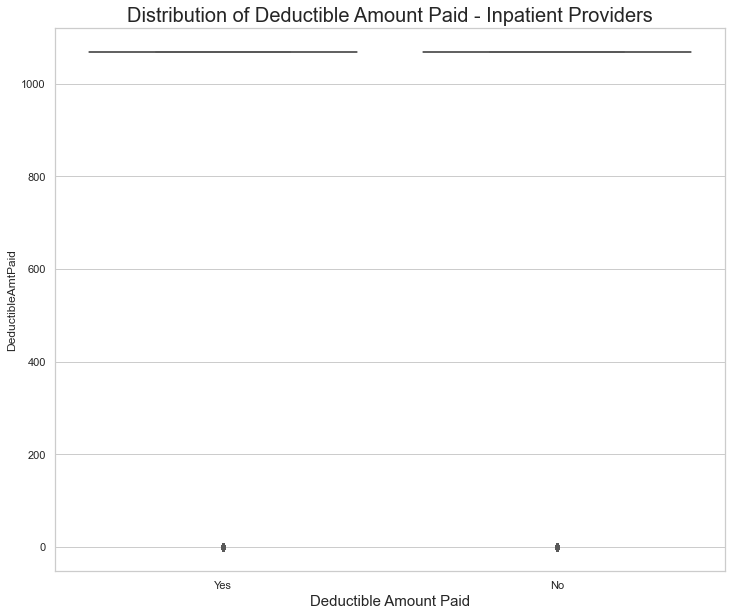

In [19]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="DeductibleAmtPaid", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'DeductibleAmtPaid',\
            palette='Set2')
plt.xlabel("Deductible Amount Paid", fontsize = 15)
plt.title("Distribution of Deductible Amount Paid - Inpatient Providers", fontsize = 20)
plt.show()

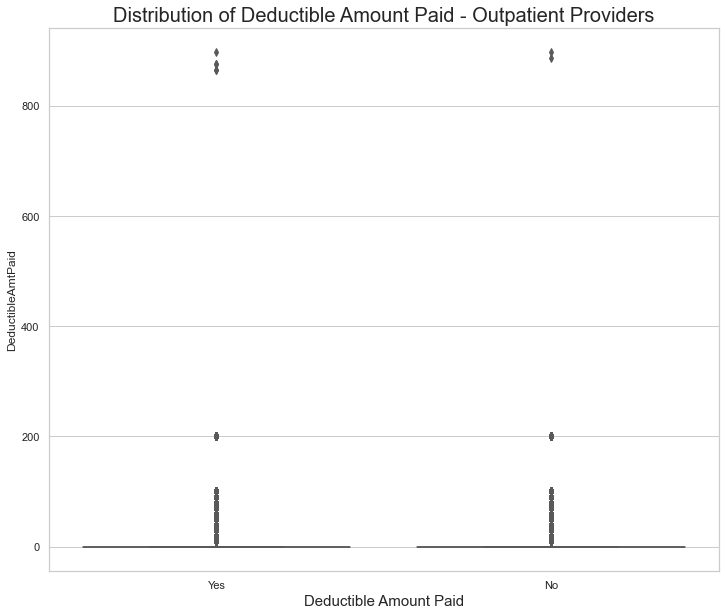

In [20]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="DeductibleAmtPaid", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'DeductibleAmtPaid',\
            palette='Set2')
plt.xlabel("Deductible Amount Paid", fontsize = 15)
plt.title("Distribution of Deductible Amount Paid - Outpatient Providers", fontsize = 20)
plt.show()

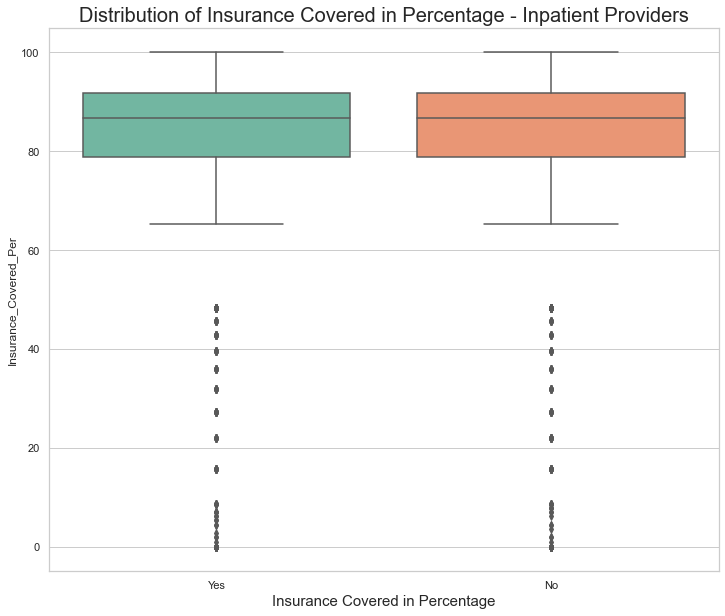

In [21]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="Insurance_Covered_Per", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'Insurance_Covered_Per',\
            palette='Set2')
plt.xlabel("Insurance Covered in Percentage", fontsize = 15)
plt.title("Distribution of Insurance Covered in Percentage - Inpatient Providers", fontsize = 20)
plt.show()

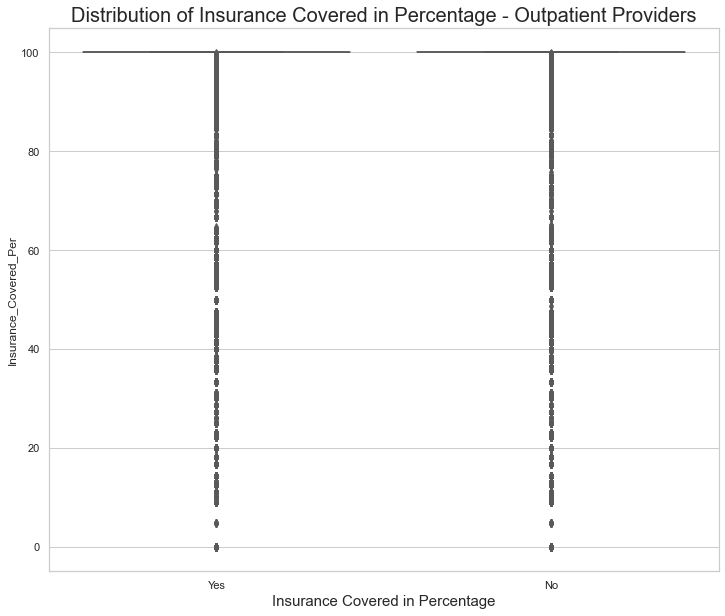

In [22]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=outp_df, x="Insurance_Covered_Per", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'Insurance_Covered_Per',\
            palette='Set2')
plt.xlabel("Insurance Covered in Percentage", fontsize = 15)
plt.title("Distribution of Insurance Covered in Percentage - Outpatient Providers", fontsize = 20)
plt.show()

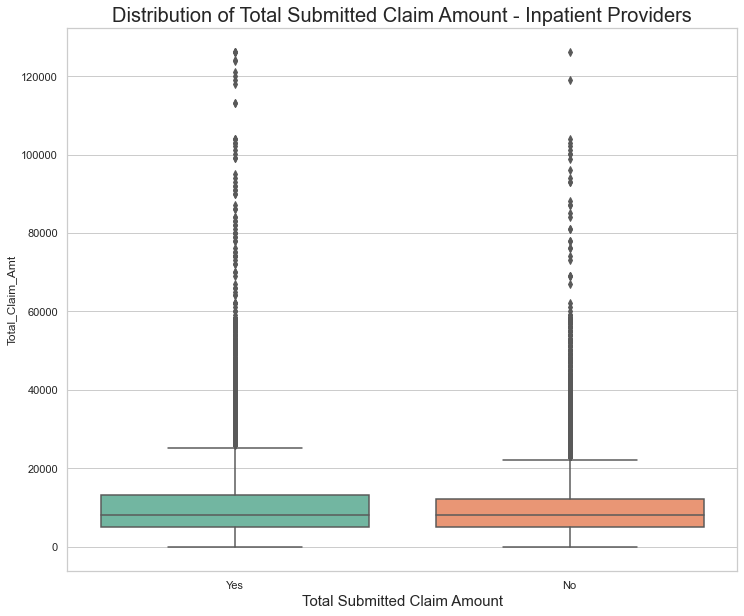

In [23]:
plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="Total_Claim_Amt", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'Total_Claim_Amt',\
            palette='Set2')
plt.xlabel("Total Submitted Claim Amount", fontsize = 15)
plt.title("Distribution of Total Submitted Claim Amount - Inpatient Providers", fontsize = 20)
plt.show()

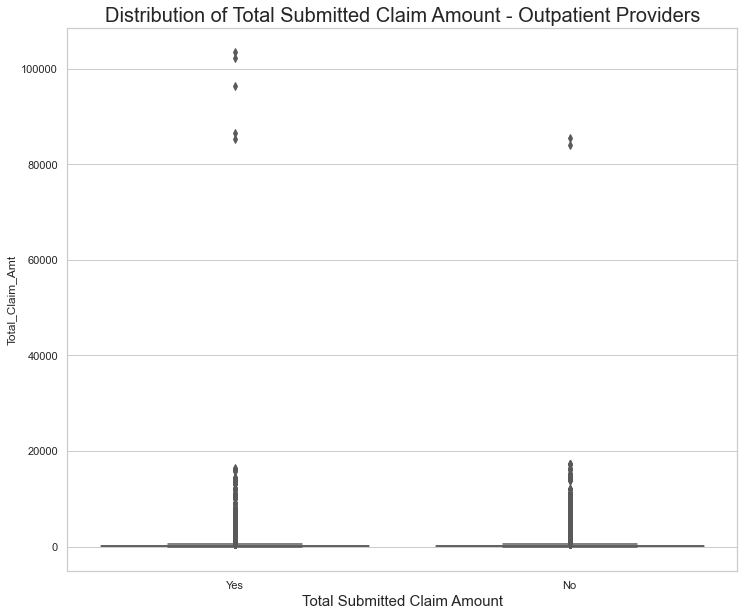

In [24]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="Total_Claim_Amt", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'Total_Claim_Amt',\
            palette='Set2')
plt.xlabel("Total Submitted Claim Amount", fontsize = 15)
plt.title("Distribution of Total Submitted Claim Amount - Outpatient Providers", fontsize = 20)
plt.show()

### Looking at maximum reimbursement received per fraud/non-fraud provider

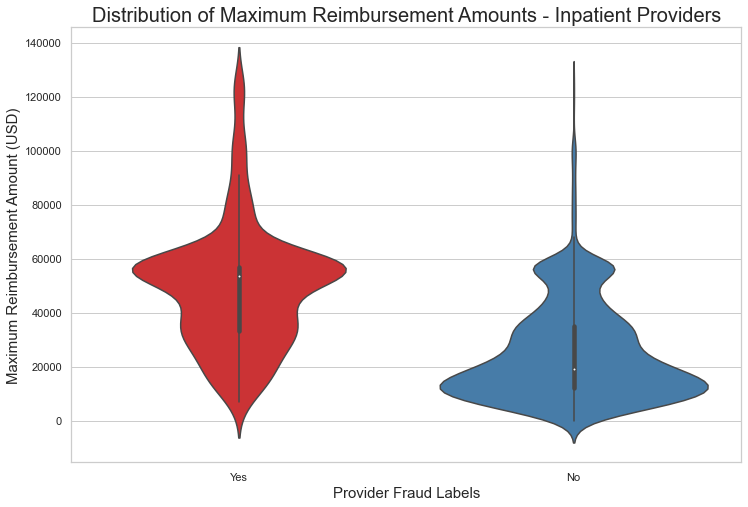

In [25]:
# Inpatient = looking at maximum reimbursement received per provider: 

in_reim_max = inp_df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')\
                   .agg(['max']).reset_index()
in_reim_max.columns=['Provider', 'Max_Reimbursement']
in_reim_max = in_reim_max.sort_values(by='Max_Reimbursement',ascending=False)

# Adding fraud labels

in_reim_max = in_reim_max.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_reim_max["PotentialFraud"], y=in_reim_max["Max_Reimbursement"], palette='Set1')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Distribution of Maximum Reimbursement Amounts - Inpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with highest Max Reimbursements received')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


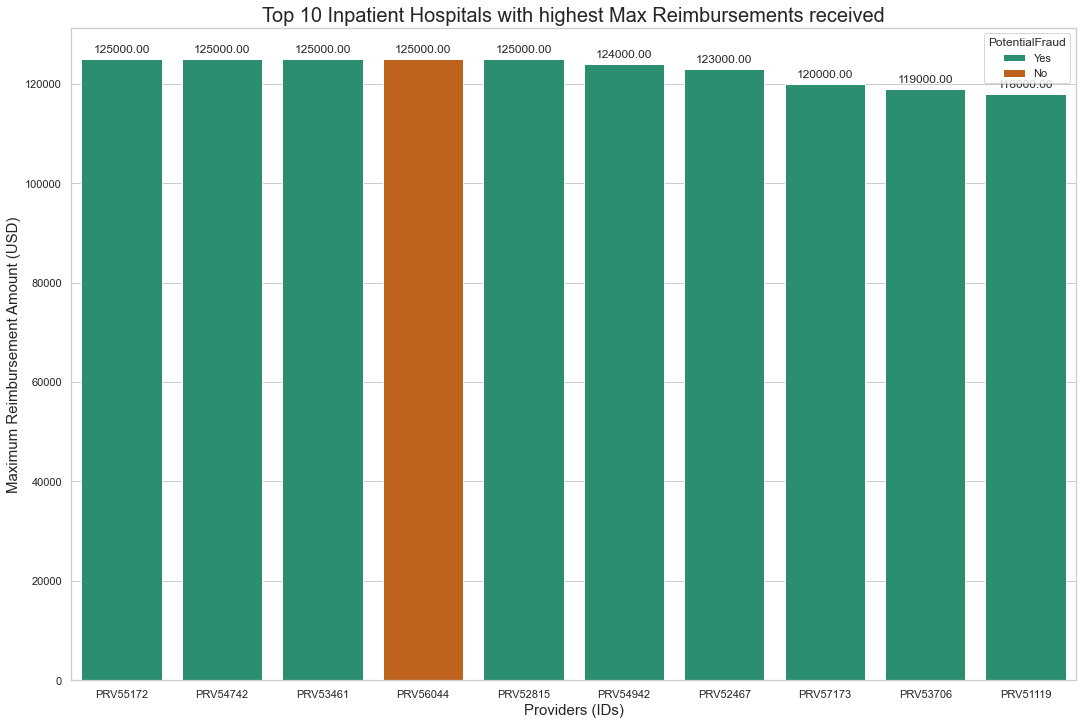

In [26]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=in_reim_max.head(10), x='Provider',y='Max_Reimbursement',\
                   hue='PotentialFraud', dodge=False, palette="Dark2")
show_values(plot)
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with highest Max Reimbursements received", fontsize = 20)

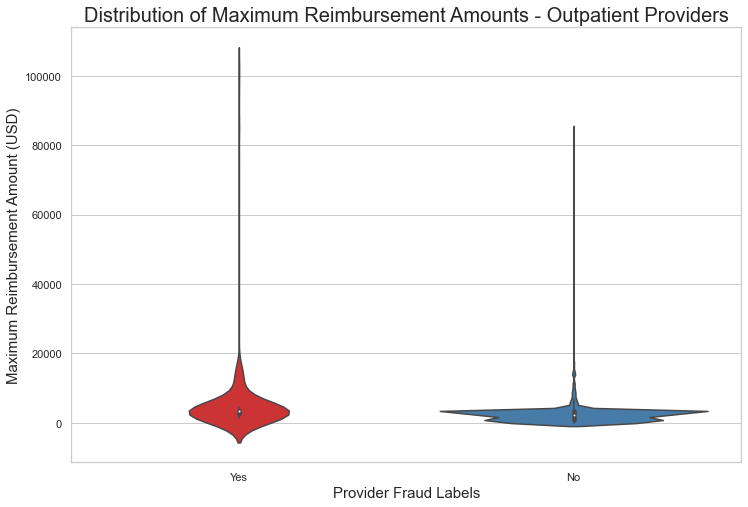

In [27]:
# Outpatient = looking at maximum reimbursement received per provider: 

out_reim_max = out_df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_reim_max.columns=['Provider', 'Max_Reimbursement']
out_reim_max = out_reim_max.sort_values(by='Max_Reimbursement',ascending=False)

# Adding fraud labels

out_reim_max = out_reim_max.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_reim_max["PotentialFraud"], y=out_reim_max["Max_Reimbursement"], palette='Set1')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Distribution of Maximum Reimbursement Amounts - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with highest Max Reimbursements received')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


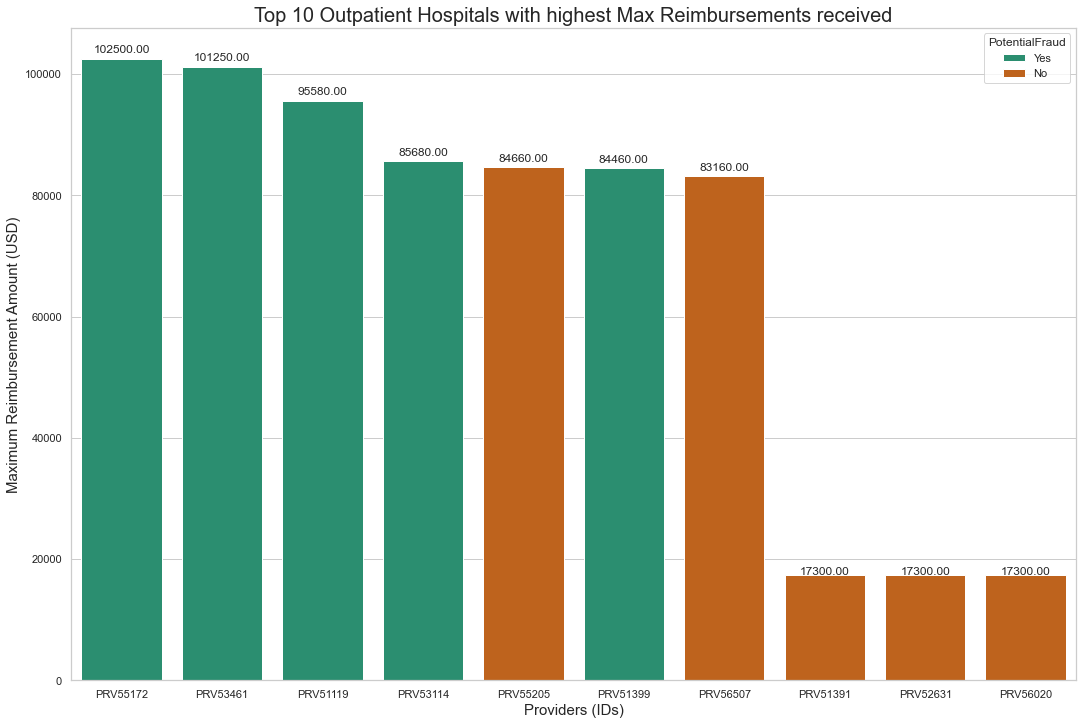

In [28]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=out_reim_max.head(10), x='Provider',y='Max_Reimbursement',\
                   hue='PotentialFraud', dodge=False, palette="Dark2")
show_values(plot)
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with highest Max Reimbursements received", fontsize = 20)

### Looking at number of claims submitted for fraud and non-fraud providers

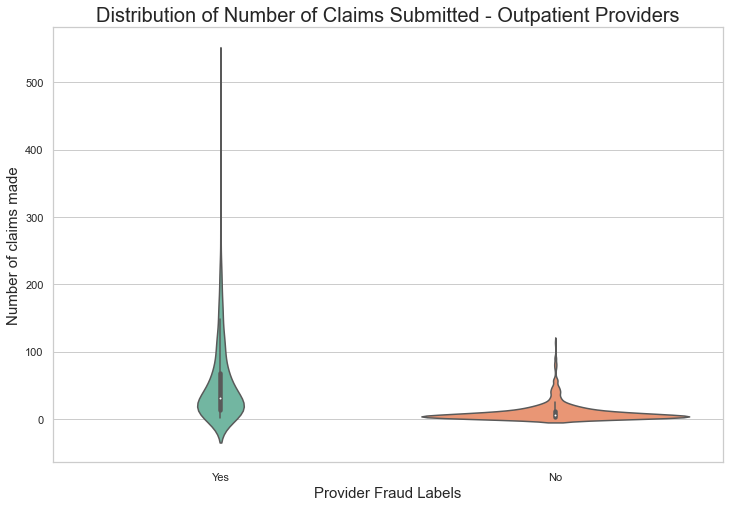

In [29]:
# Create df to number of claims per provider

in_prov_clm_df = inp_df[['Provider','ClaimID']].groupby('Provider').agg(['count']).reset_index()
in_prov_clm_df.columns=['Provider', 'No. of Claims']
in_prov_clm_df = in_prov_clm_df.sort_values(by='No. of Claims',ascending=False)

# Adding fraud labels

in_prov_clm_df = in_prov_clm_df.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_prov_clm_df["PotentialFraud"], y=in_prov_clm_df["No. of Claims"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Number of claims made", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Claims submitted')

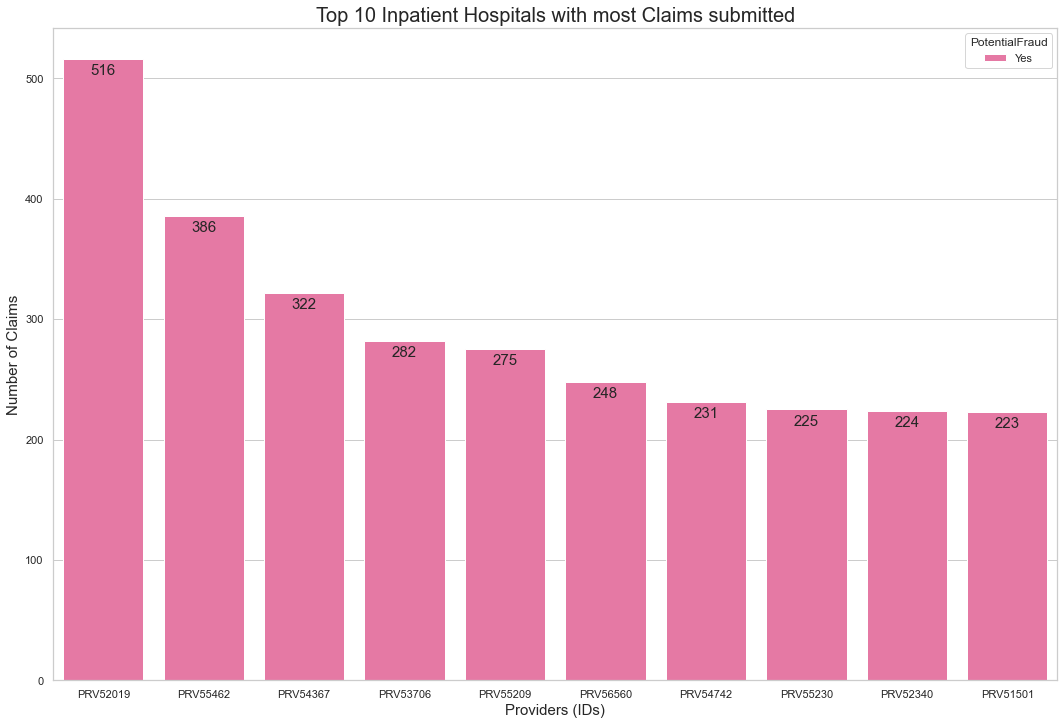

In [30]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_prov_clm_df.head(10), x='Provider',\
                   y='No. of Claims', hue='PotentialFraud', dodge=False, palette="RdPu")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Claims submitted", fontsize = 20)

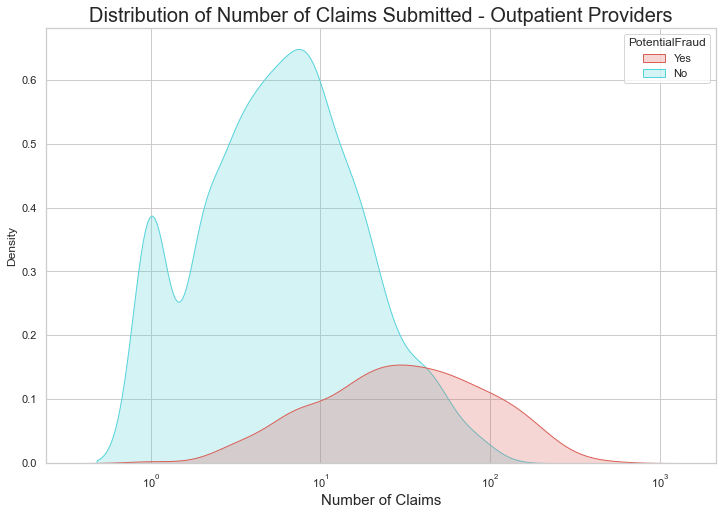

In [31]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='hls')
plt.xlabel("Number of Claims", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers", fontsize = 20)
plt.show()

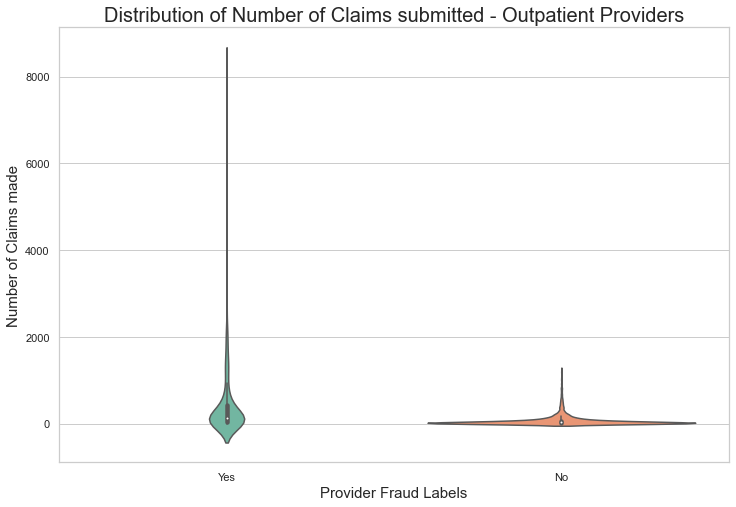

In [32]:
# Create df to number of claims per provider

out_prov_clm_df = out_df[['Provider','ClaimID']].groupby('Provider').agg(['count']).reset_index()
out_prov_clm_df.columns=['Provider', 'No. of Claims']
out_prov_clm_df = out_prov_clm_df.sort_values(by='No. of Claims',ascending=False)

# Adding fraud labels

out_prov_clm_df = out_prov_clm_df.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_prov_clm_df["PotentialFraud"], y=out_prov_clm_df["No. of Claims"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Number of Claims made", fontsize = 15)
plt.title("Distribution of Number of Claims submitted - Outpatient Providers", fontsize = 20)
plt.show()

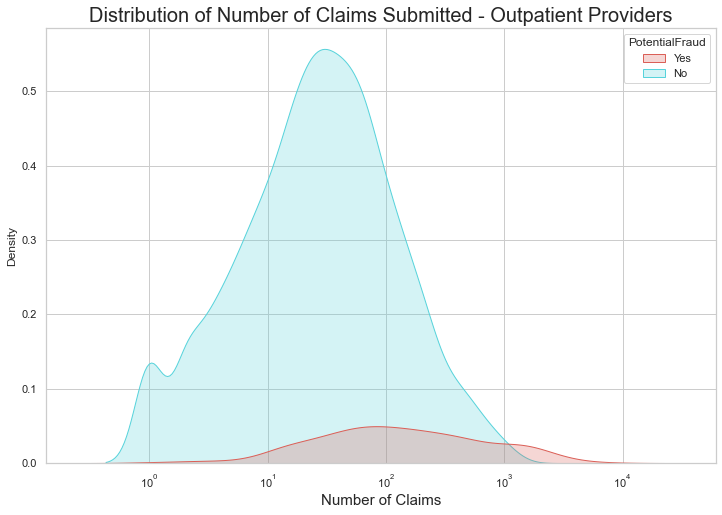

In [33]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='hls')
plt.xlabel("Number of Claims", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Claims submitted')

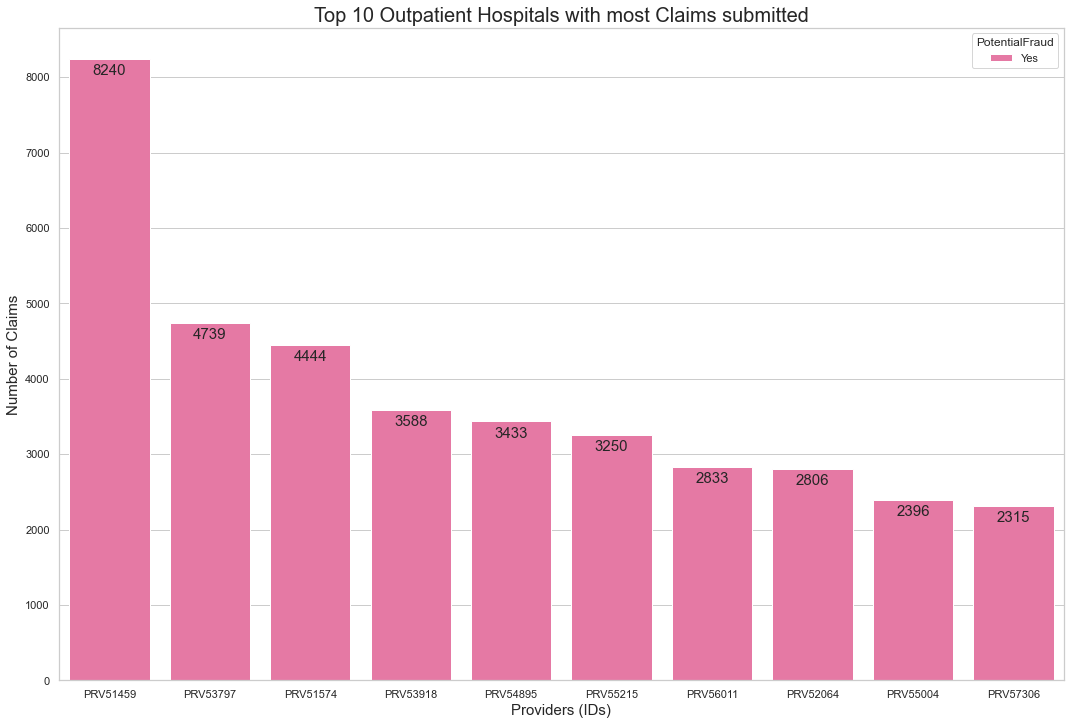

In [34]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_prov_clm_df.head(10), x='Provider',\
                   y='No. of Claims', hue='PotentialFraud', dodge=False, palette="RdPu")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Claims submitted", fontsize = 20)

### Looking at average Diagnosis Code Count for fraud and non-fraud providers

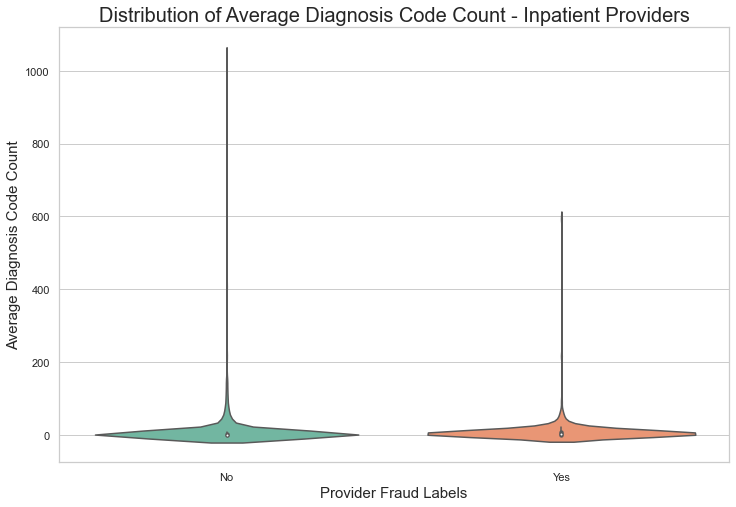

In [35]:
# Inpatient = looking at average Diagnosis Code Count per provider: 

in_diag_code = inp_df[['Provider','Diag_Code_Cnt']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_diag_code.columns=['Provider', 'Diag_Code_Cnt']
in_diag_code = in_diag_code.sort_values(by='Diag_Code_Cnt',ascending=False)

# Adding fraud labels

in_diag_code = in_diag_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_diag_code["PotentialFraud"], y=in_diag_code["Diag_Code_Cnt"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Diagnosis Code Count", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers", fontsize = 20)
plt.show()

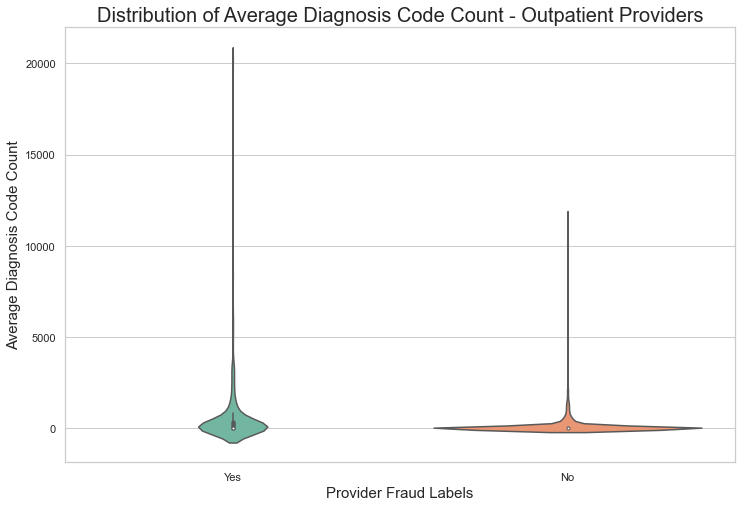

In [36]:
# Outpatient = looking at average Diagnosis Code Count per provider: 

out_diag_code = out_df[['Provider','Diag_Code_Cnt']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_diag_code.columns=['Provider', 'Diag_Code_Cnt']
out_diag_code = out_diag_code.sort_values(by='Diag_Code_Cnt',ascending=False)

# Adding fraud labels

out_diag_code = out_diag_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_diag_code["PotentialFraud"], y=out_diag_code["Diag_Code_Cnt"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Diagnosis Code Count", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers", fontsize = 20)
plt.show()

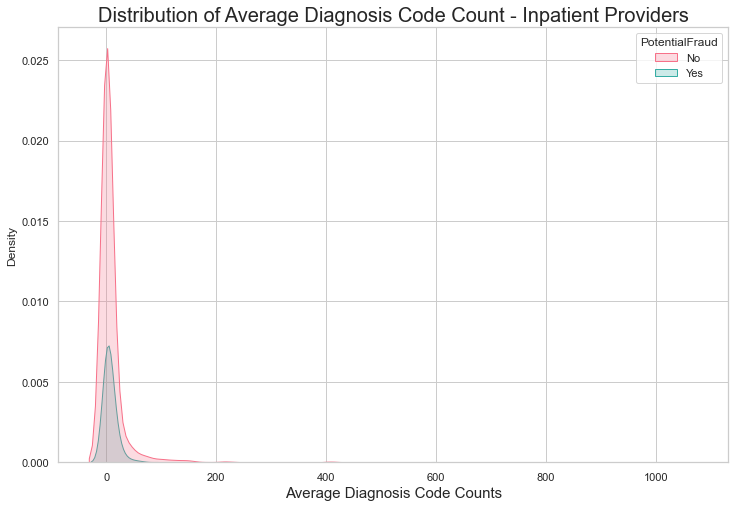

In [37]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers", fontsize = 20)
plt.show()

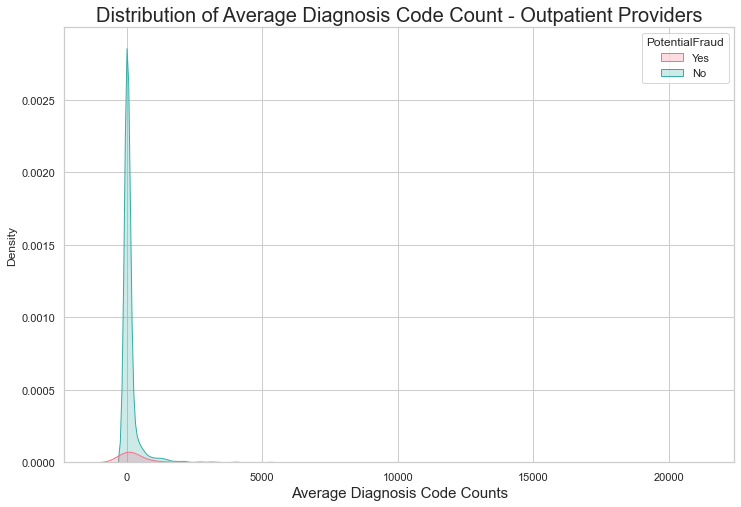

In [38]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Diagnosis Code Counts')

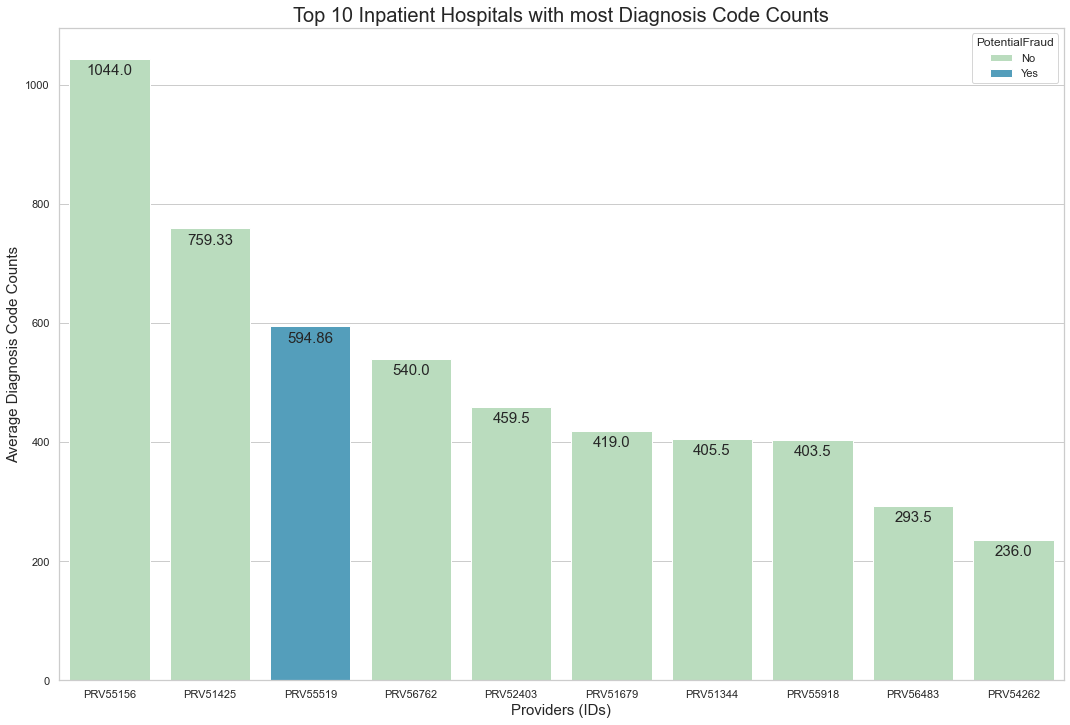

In [41]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_diag_code.head(10), x='Provider', dodge=False,\
                   y='Diag_Code_Cnt', hue='PotentialFraud', palette="GnBu")
for p in splot.patches:
    splot.annotate(format(p.get_height().round(2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Diagnosis Code Counts", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Diagnosis Code Counts')

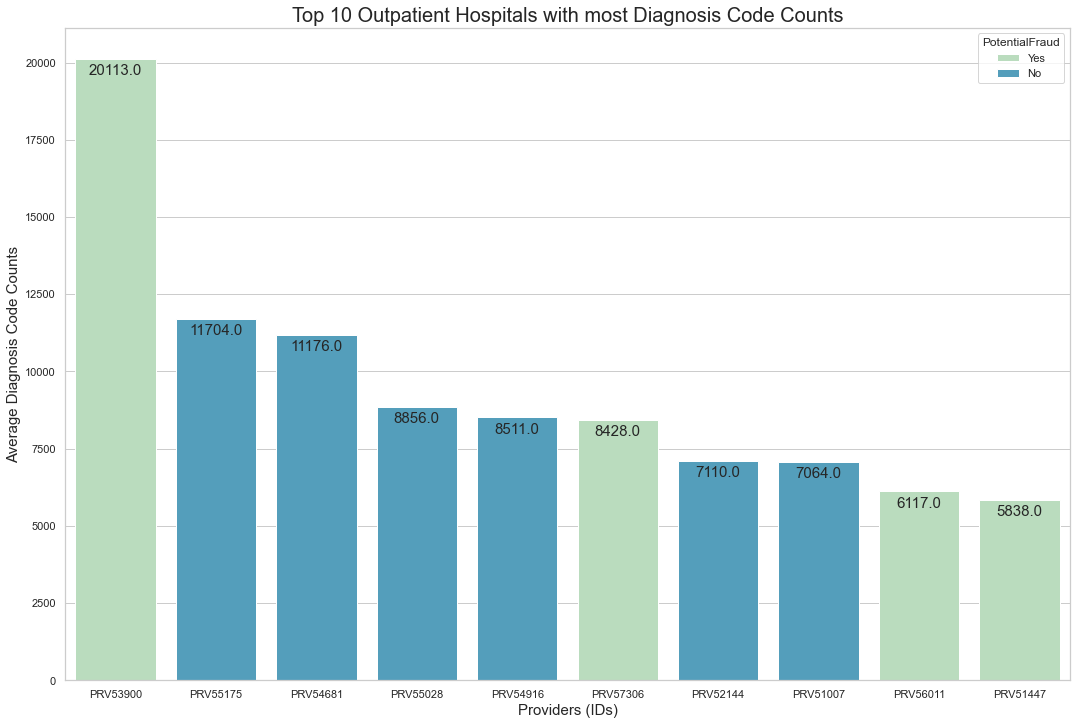

In [42]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_diag_code.head(10), x='Provider', y='Diag_Code_Cnt',\
                   hue='PotentialFraud', dodge=False, palette="GnBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Diagnosis Code Counts", fontsize = 20)

### Looking at average Procedure Code Count for fraud and non-fraud providers

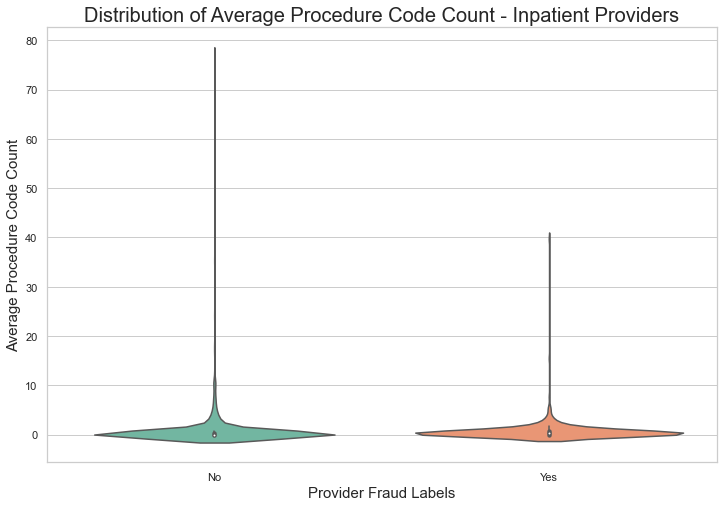

In [43]:
# Inpatient = looking at average Procedure Code Count per provider: 

in_proc_code = inp_df[['Provider','Proc_Code_Cnt']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_proc_code.columns=['Provider', 'Proc_Code_Cnt']
in_proc_code = in_proc_code.sort_values(by='Proc_Code_Cnt',ascending=False)

# Adding fraud labels

in_proc_code = in_proc_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_proc_code["PotentialFraud"], y=in_proc_code["Proc_Code_Cnt"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Procedure Code Count", fontsize = 15)
plt.title("Distribution of Average Procedure Code Count - Inpatient Providers", fontsize = 20)
plt.show()

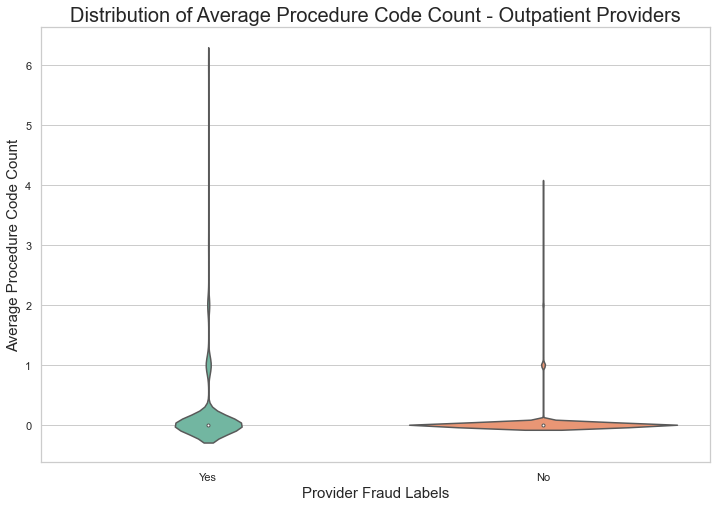

In [44]:
# Outpatient = looking at average Procedure Code Count per provider: 

out_proc_code = out_df[['Provider','Proc_Code_Cnt']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_proc_code.columns=['Provider', 'Proc_Code_Cnt']
out_proc_code = out_proc_code.sort_values(by='Proc_Code_Cnt',ascending=False)

# Adding fraud labels

out_proc_code = out_proc_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_proc_code["PotentialFraud"], y=out_proc_code["Proc_Code_Cnt"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Procedure Code Count", fontsize = 15)
plt.title("Distribution of Average Procedure Code Count - Outpatient Providers", fontsize = 20)
plt.show()

### Looking at claim duration for fraud/non-fraud providers

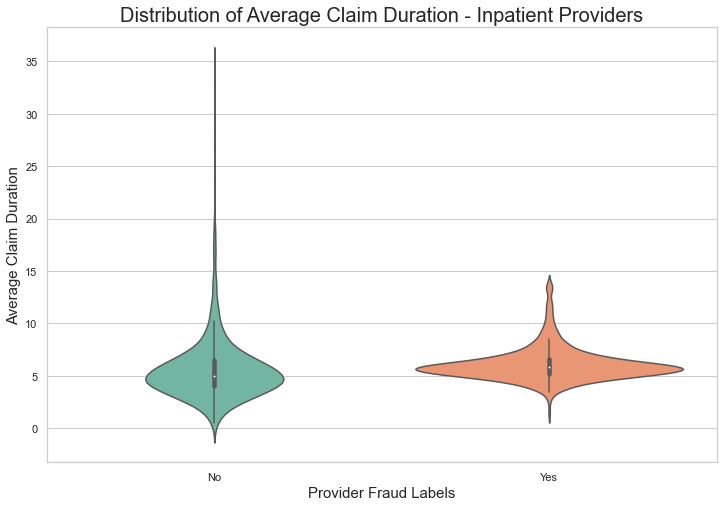

In [45]:
# Inpatient = looking at average Claim duration per provider: 

in_clm_dur = inp_df[['Provider','Claim_Duration']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_clm_dur.columns=['Provider', 'Claim_Duration']
in_clm_dur = in_clm_dur.sort_values(by='Claim_Duration',ascending=False)

# Adding fraud labels

in_clm_dur = in_clm_dur.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_clm_dur["PotentialFraud"], y=in_clm_dur["Claim_Duration"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers", fontsize = 20)
plt.show()

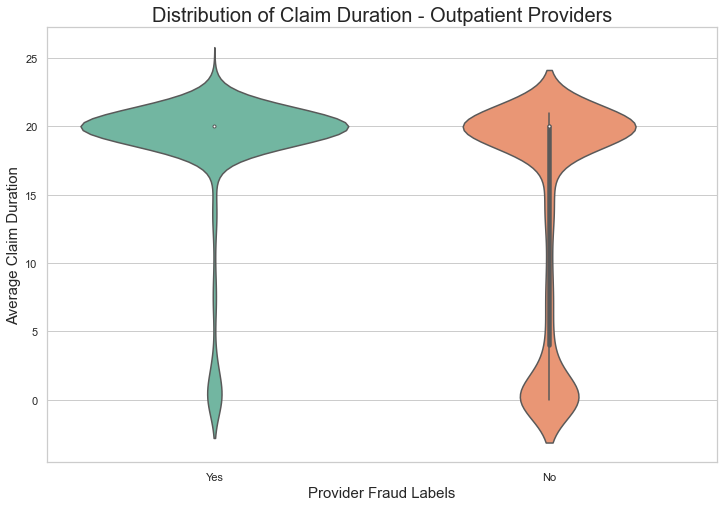

In [46]:
# Outpatient = looking at average Claim duration per provider: 

out_clm_dur = out_df[['Provider','Claim_Duration']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_clm_dur.columns=['Provider', 'Claim_Duration']
out_clm_dur = out_clm_dur.sort_values(by='Claim_Duration',ascending=False)

# Adding fraud labels

out_clm_dur = out_clm_dur.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_clm_dur["PotentialFraud"], y=out_clm_dur["Claim_Duration"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Claim Duration - Outpatient Providers", fontsize = 20)
plt.show()

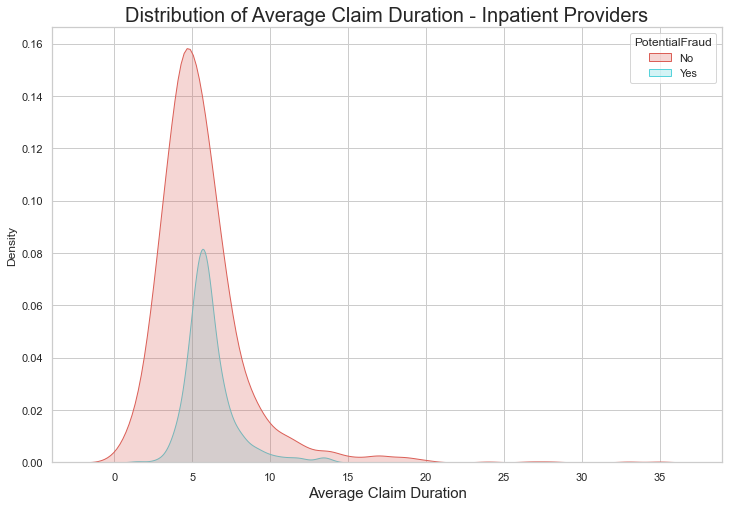

In [47]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers", fontsize = 20)
plt.show()

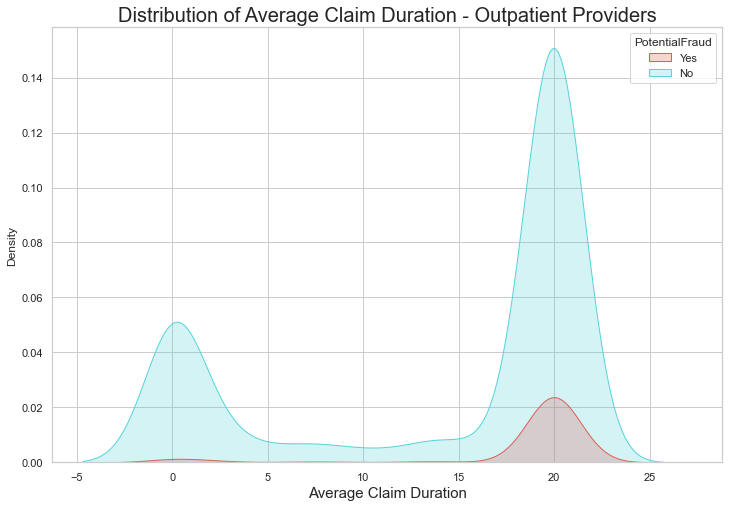

In [48]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Claim Durations')

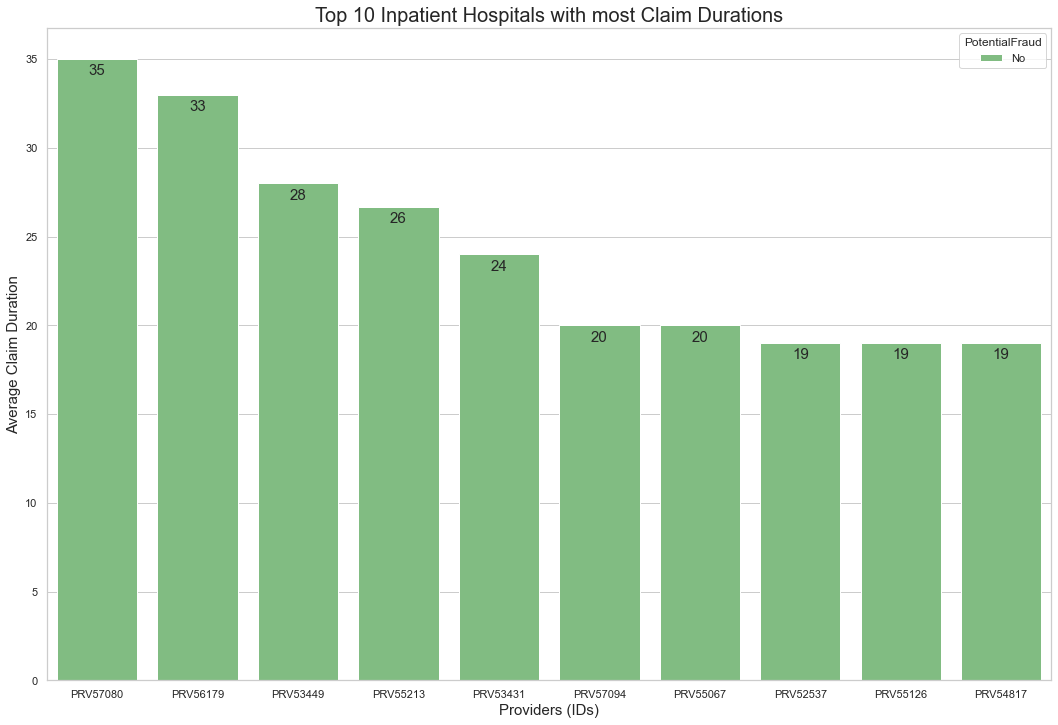

In [49]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_clm_dur.head(10), x='Provider', dodge=False,\
                   y='Claim_Duration', hue='PotentialFraud', palette="YlGn")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Claim Durations", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Claim Durations')

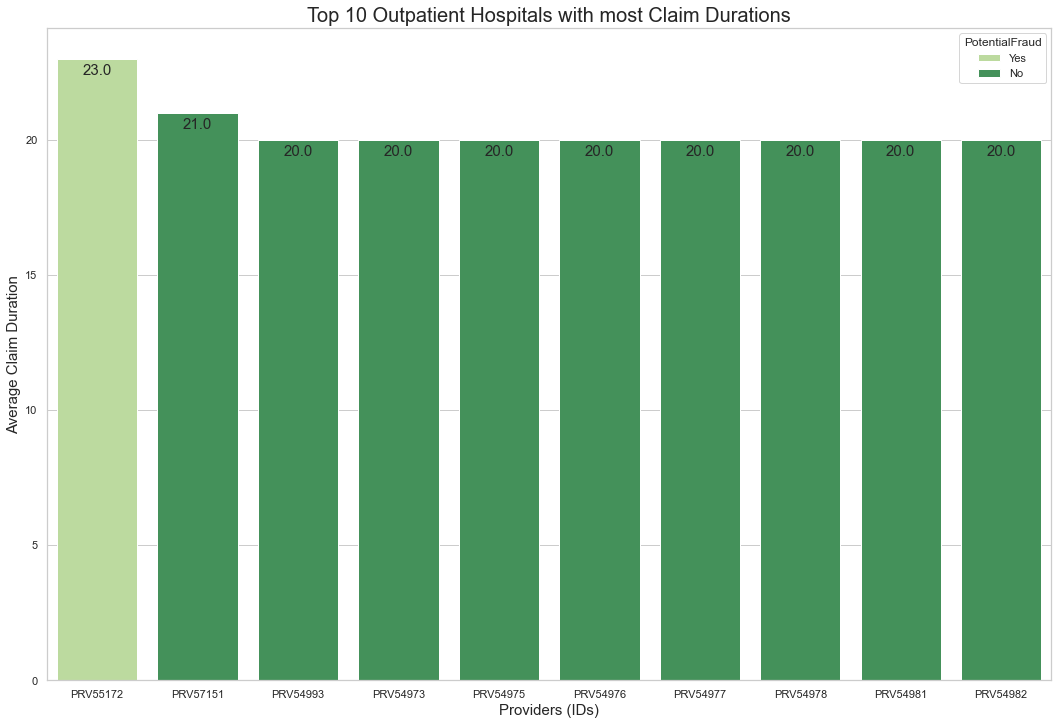

In [51]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_clm_dur.head(10), x='Provider', y='Claim_Duration',\
                   hue='PotentialFraud', dodge=False, palette="YlGn")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Claim Durations", fontsize = 20)

### Looking at average patient age for fraud/non-fraud providers

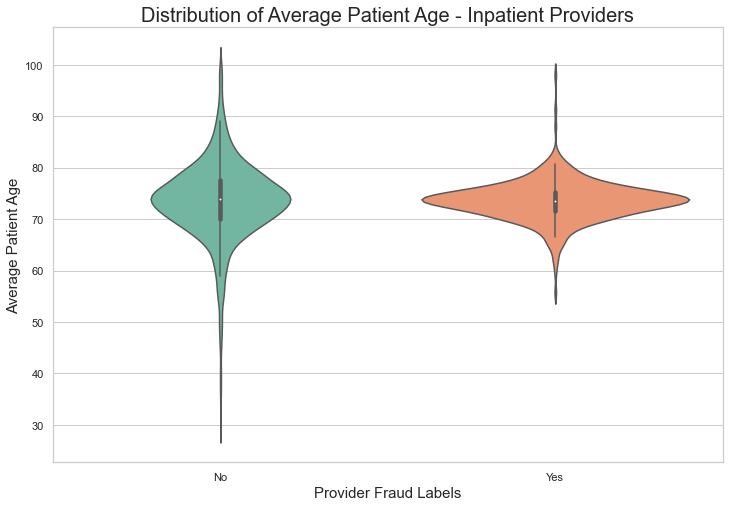

In [52]:
# Inpatient = looking at average patient age per provider: 

in_pat_age = inp_df[['Provider','Age']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_pat_age.columns=['Provider', 'Age']
in_pat_age = in_pat_age.sort_values(by='Age',ascending=False)

# Adding fraud labels

in_pat_age = in_pat_age.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_pat_age["PotentialFraud"], y=in_pat_age["Age"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Inpatient Providers", fontsize = 20)
plt.show()

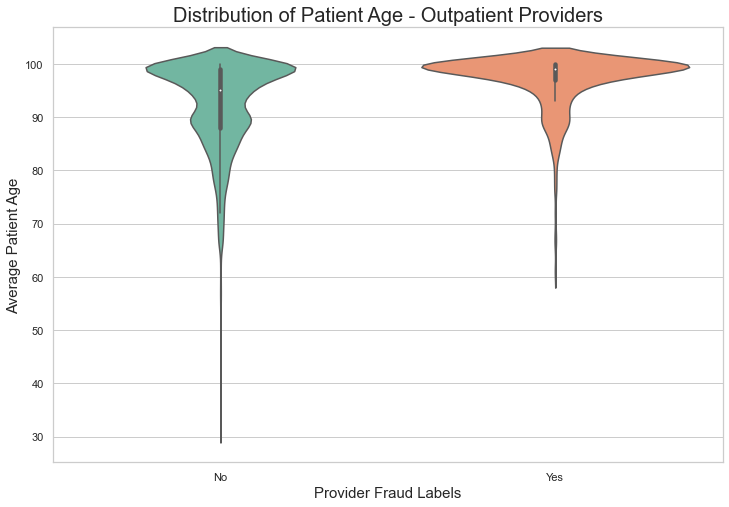

In [53]:
# Outpatient = looking at average Claim duration per provider: 

out_pat_age = out_df[['Provider','Age']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_pat_age.columns=['Provider', 'Age']
out_pat_age = out_pat_age.sort_values(by='Age',ascending=False)

# Adding fraud labels

out_pat_age = out_pat_age.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_pat_age["PotentialFraud"], y=out_pat_age["Age"], palette='Set2')
plt.xlabel("Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Patient Age - Outpatient Providers", fontsize = 20)
plt.show()

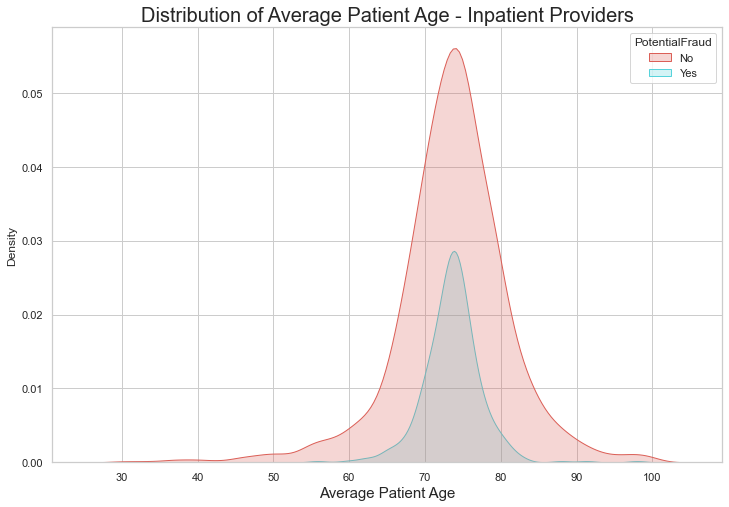

In [54]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Inpatient Providers", fontsize = 20)
plt.show()

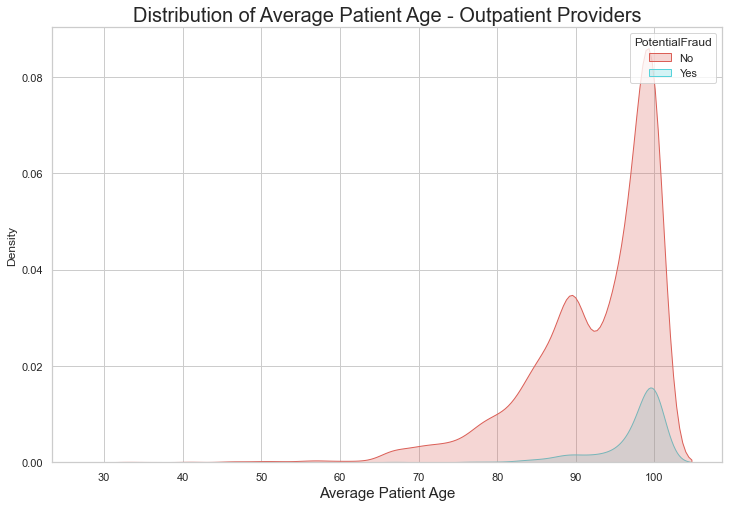

In [55]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Outpatient Providers", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with highest average Patient Age')

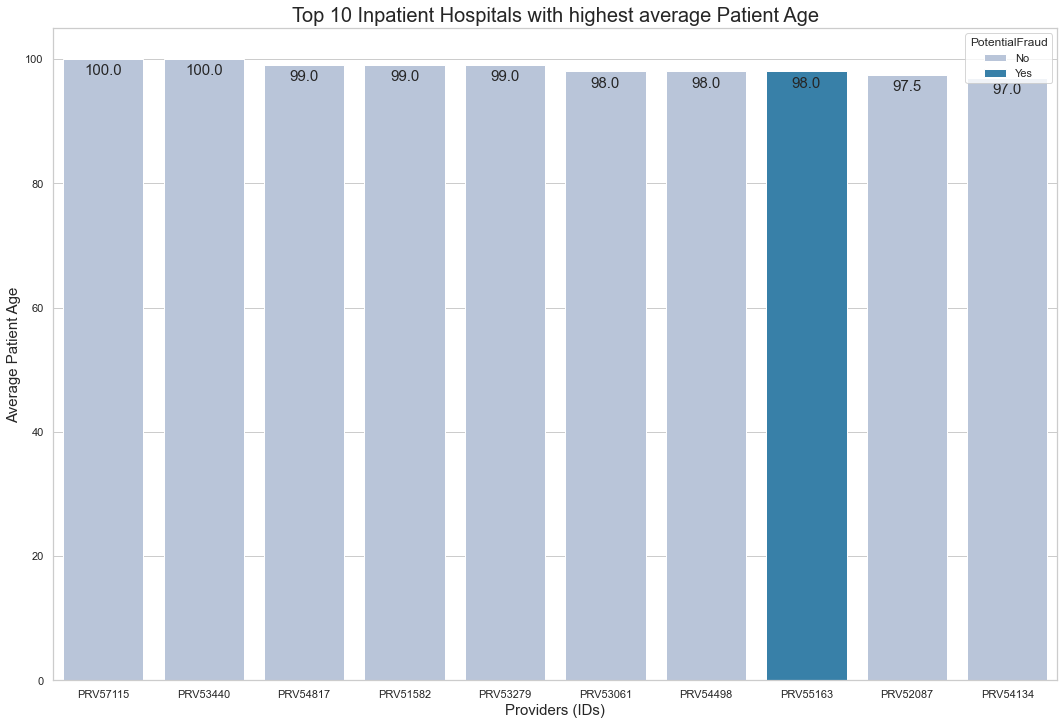

In [57]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_pat_age.head(10), x='Provider', dodge=False,\
                   y='Age', hue='PotentialFraud', palette="PuBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with highest average Patient Age", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with highest average Patient Age')

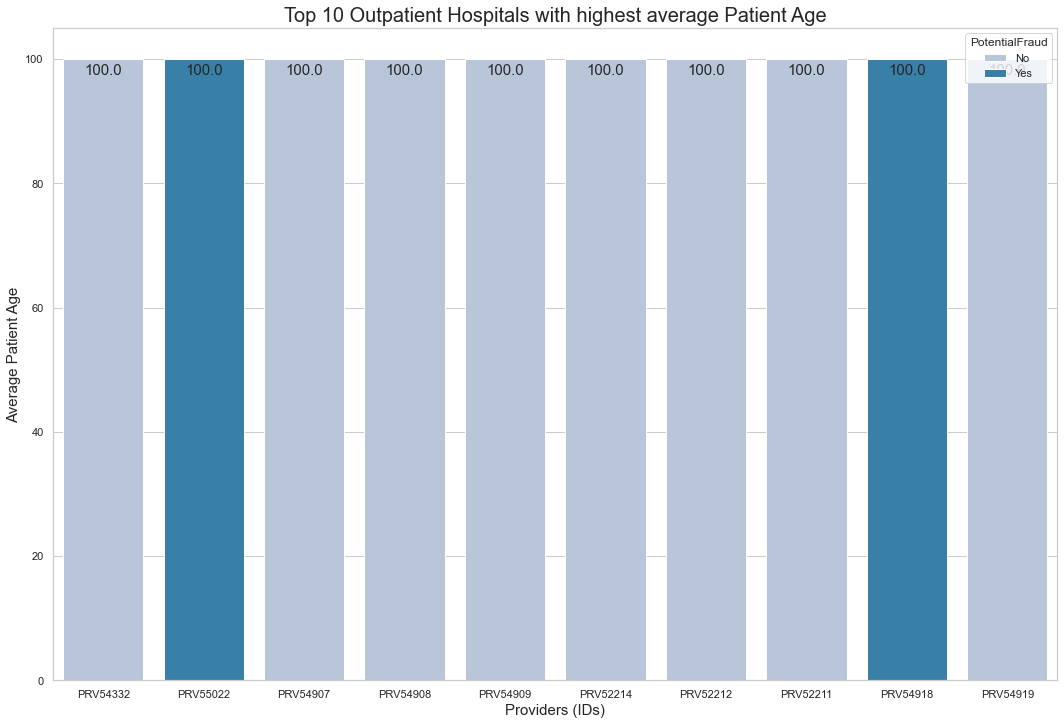

In [59]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_pat_age.head(10), x='Provider', y='Age',\
                   hue='PotentialFraud', dodge=False, palette="PuBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Providers (IDs)", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with highest average Patient Age", fontsize = 20)

### Looking at corr matrix for some features

In [60]:
# Using only certain features from the complete set

inp_corr = inp_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]

out_corr= inp_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]

<AxesSubplot:>

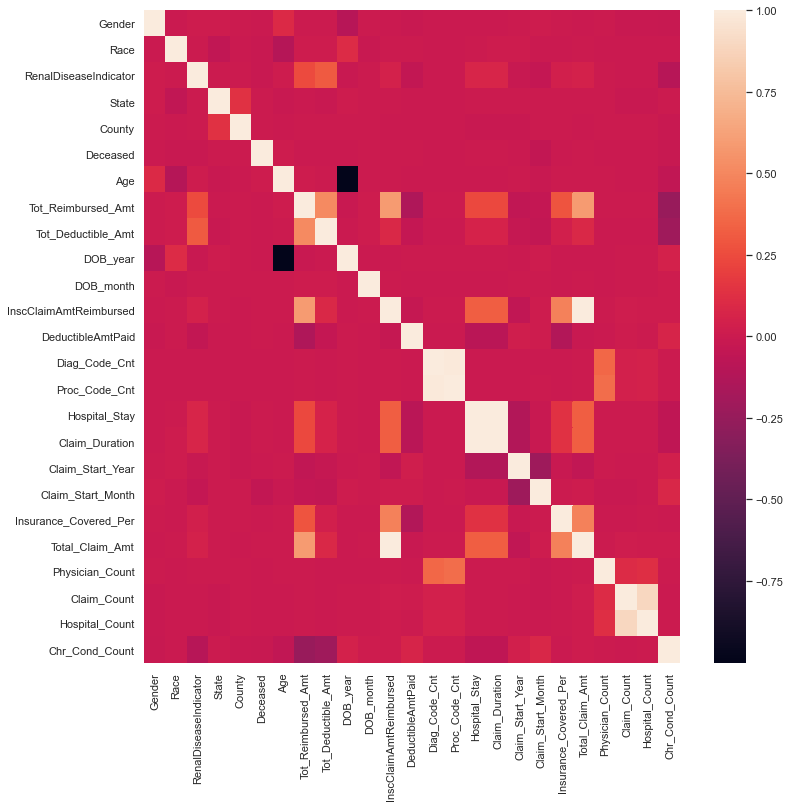

In [61]:
# Inpatient dataset correlation map

plt.figure(figsize=(12, 12))
sns.heatmap(inp_corr.corr())

<AxesSubplot:>

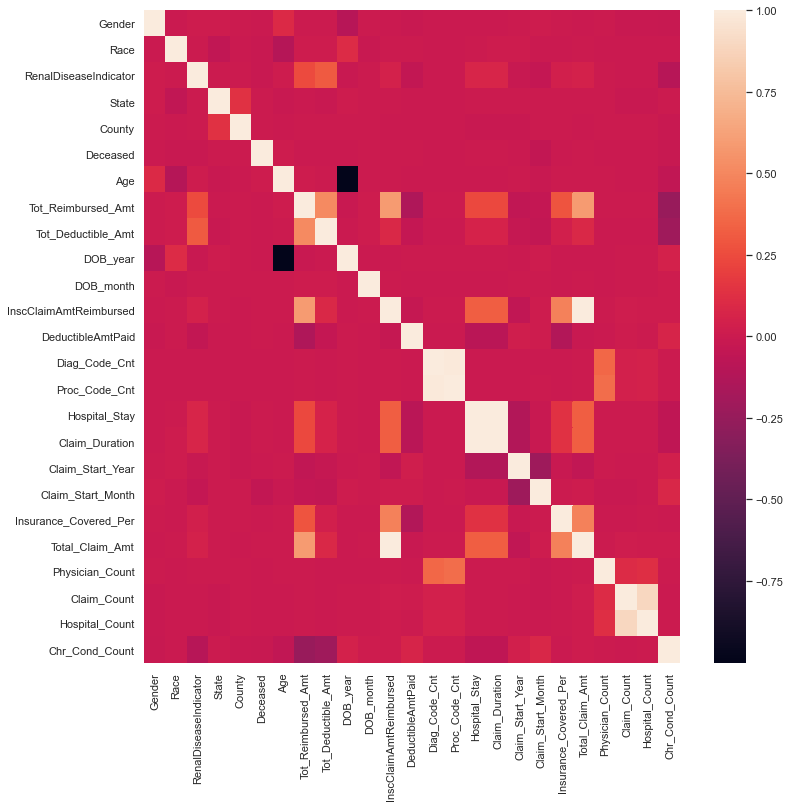

In [62]:
# Outatient dataset correlation map

plt.figure(figsize=(12, 12))
sns.heatmap(out_corr.corr())

## Physician focused EDA

- Looking at other characteristics for attending Physicians with high inpatient/outpatient claims

In [63]:
# Number of claims for Inpatient doctors:

inp_doctors = pd.DataFrame(inp_df['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
inp_doctors.columns=['AttendingPhysician', 'Inpatient_Claims']
inp_doctors = inp_doctors.head(10)

# Number of claims for Outpatient doctors:

out_doctors = pd.DataFrame(out_df['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
out_doctors.columns=['AttendingPhysician', 'Outpatient_Claims']
out_doctors = out_doctors.head(10)

# Creating tables for merging to analyze other characteristics

df_inp = inp_df[['AttendingPhysician', 'Age', 'InscClaimAmtReimbursed',\
        'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Claim_Duration',\
        'Total_Claim_Amt', 'Chr_Cond_Count']]\
        .groupby('AttendingPhysician').agg(['mean']).astype(int)

df_out = out_df[['AttendingPhysician', 'Age', 'InscClaimAmtReimbursed',\
        'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Claim_Duration',\
        'Total_Claim_Amt', 'Chr_Cond_Count']]\
        .groupby('AttendingPhysician').agg(['mean']).astype(int)

# Merging with claim count dfs

inp_doctors = inp_doctors.merge(df_inp, on='AttendingPhysician')
inp_doctors.columns=['Attd_Physician', 'Inp_Claims', 'mean_age','mean_ins_amt_reim', \
                     'mean_diag_cde','mean_proc_cde','mean_clm_dur','mean_tot_clm_amt','mean_chr_cond']
out_doctors = out_doctors.merge(df_out, on='AttendingPhysician')
out_doctors.columns=['Attd_Physician', 'Out_Claims', 'mean_age','mean_ins_amt_reim',\
                     'mean_diag_cde','mean_proc_cde','mean_clm_dur','mean_tot_clm_amt','mean_chr_cond']                                      

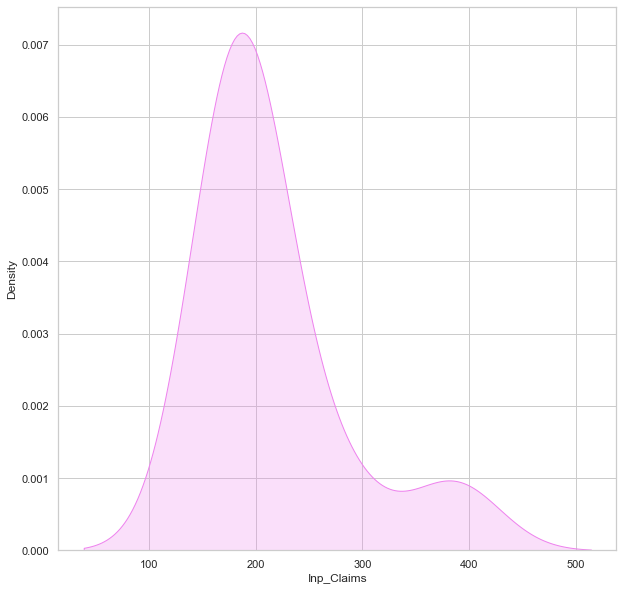

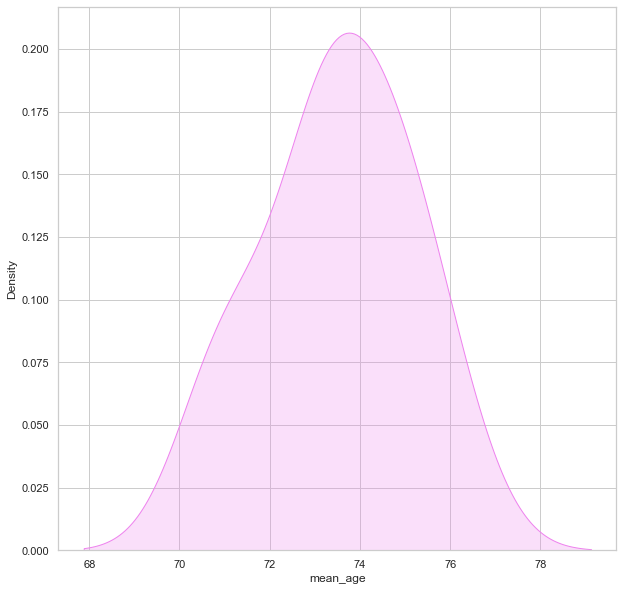

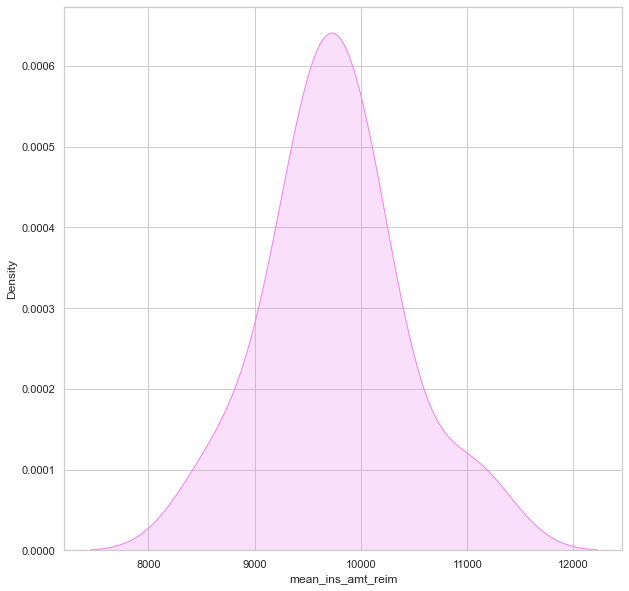

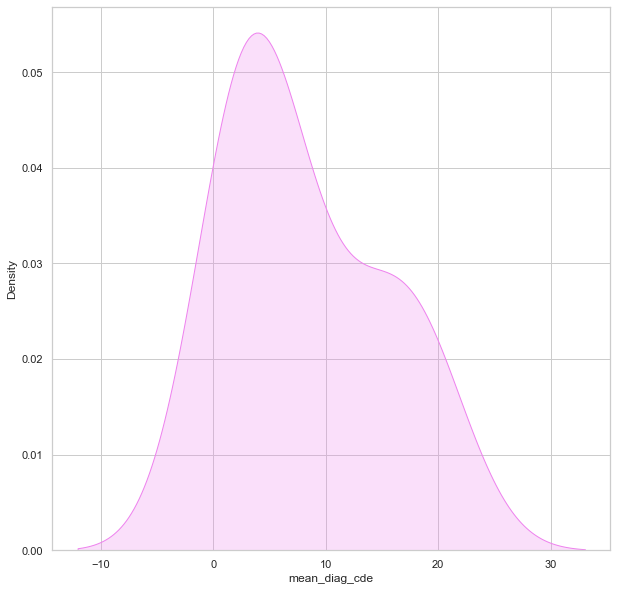

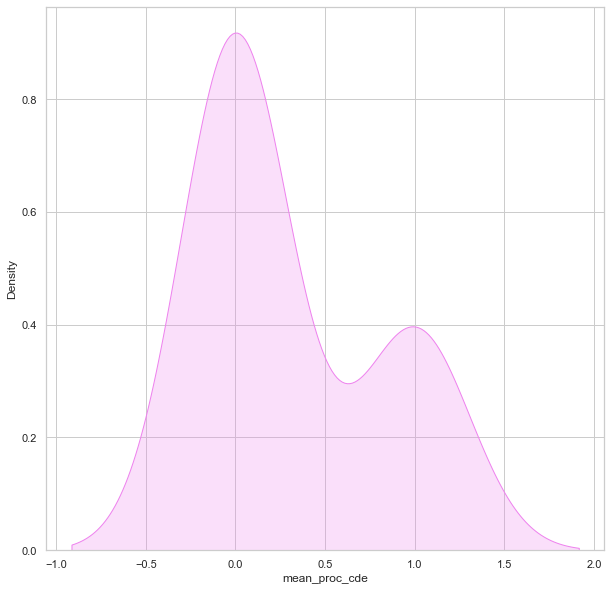

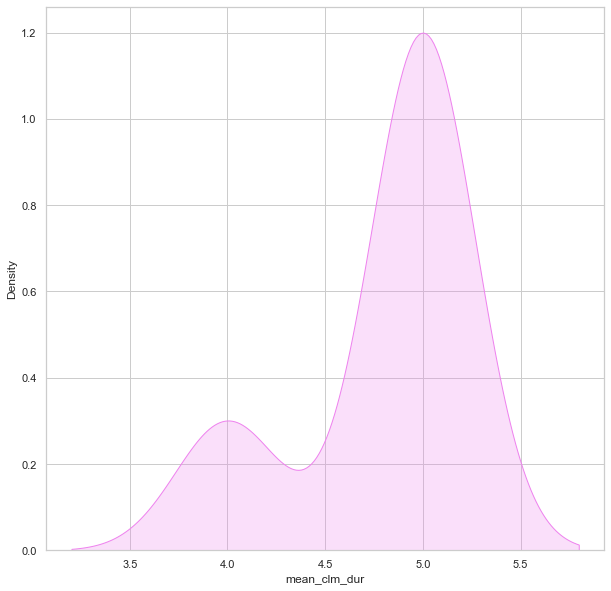

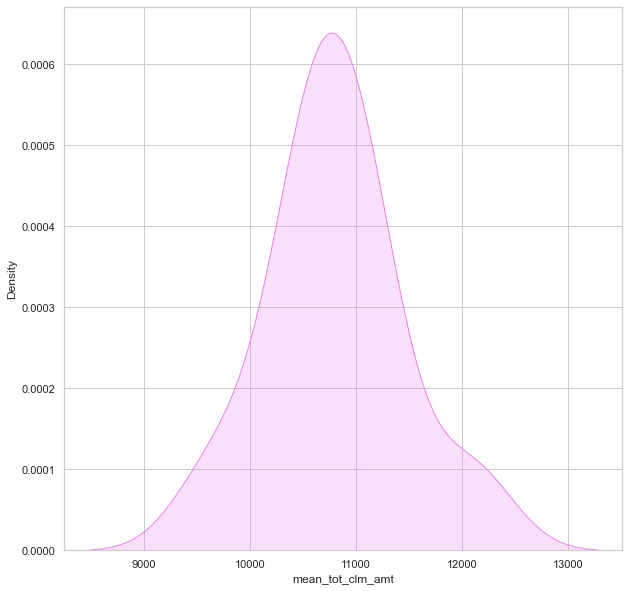

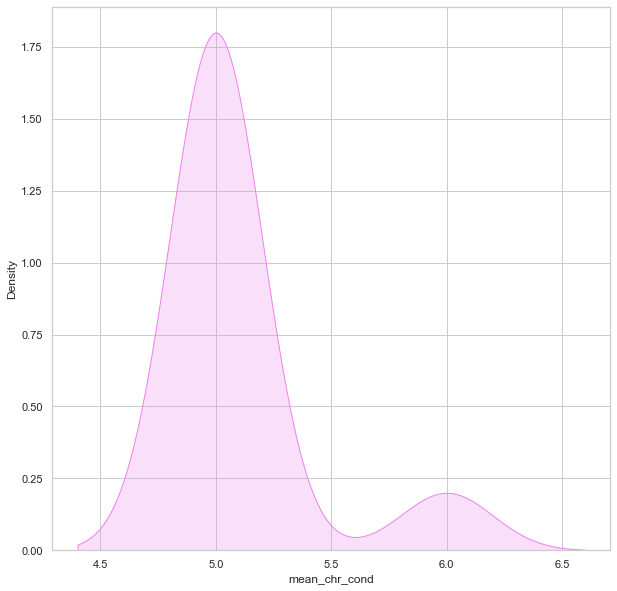

In [64]:
# Inpatient dataset density plots

col_list = ['Inp_Claims', 'mean_age', 'mean_ins_amt_reim','mean_diag_cde',\
           'mean_proc_cde', 'mean_clm_dur', 'mean_tot_clm_amt','mean_chr_cond']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = inp_doctors[col]
    sns.kdeplot(x, shade=True, color="violet")

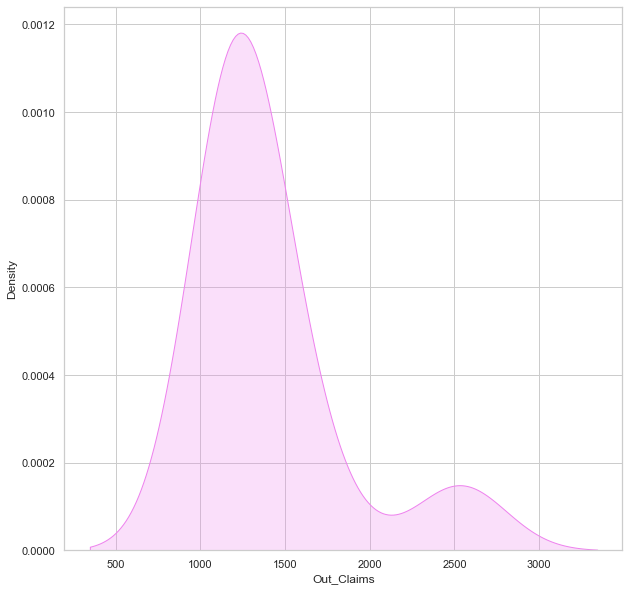

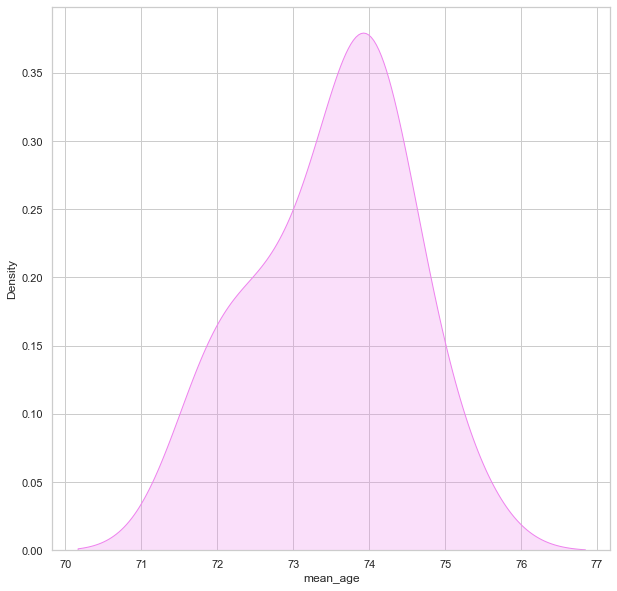

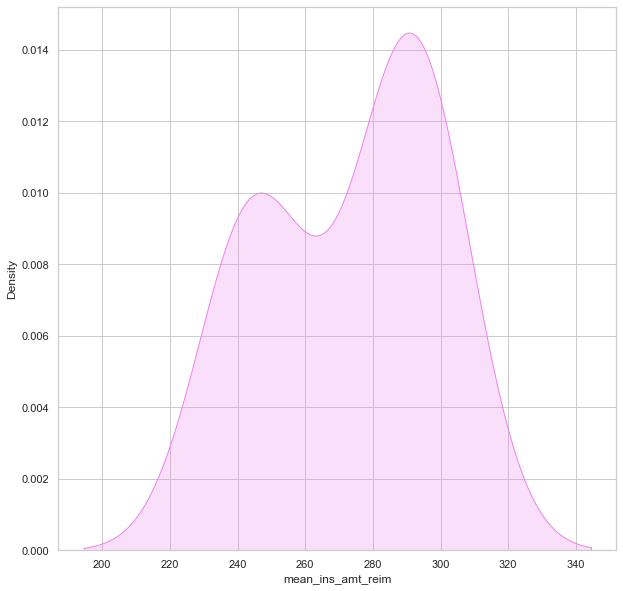

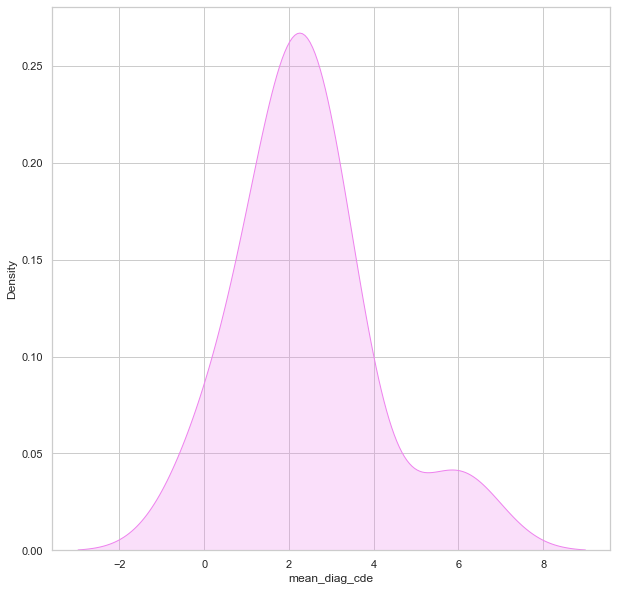

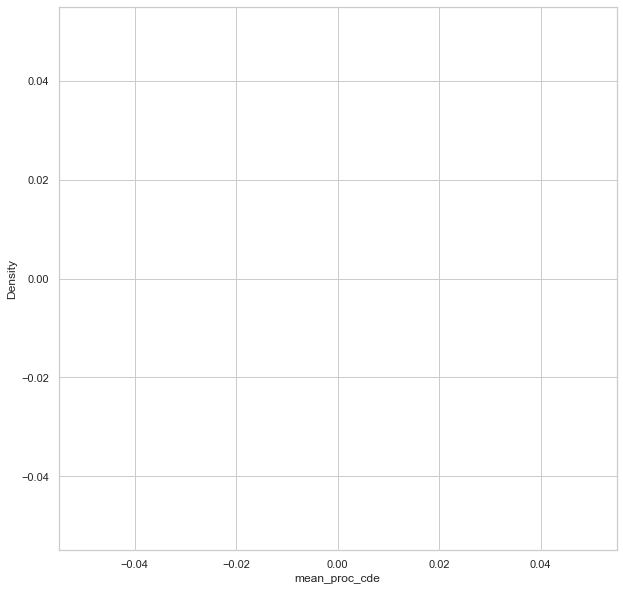

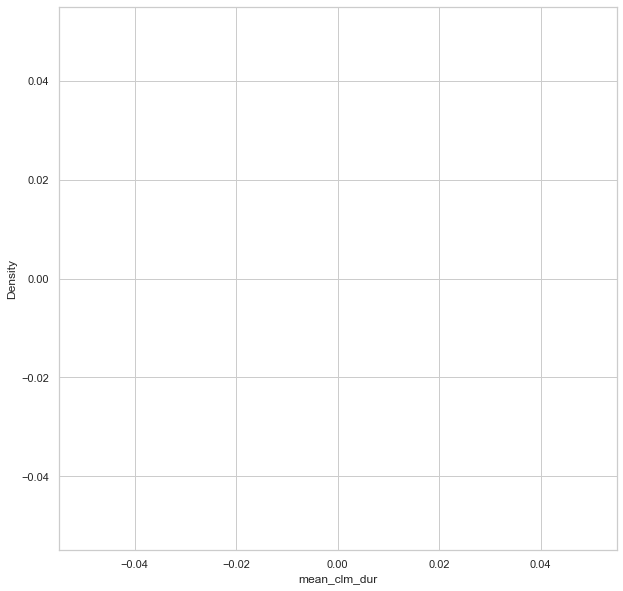

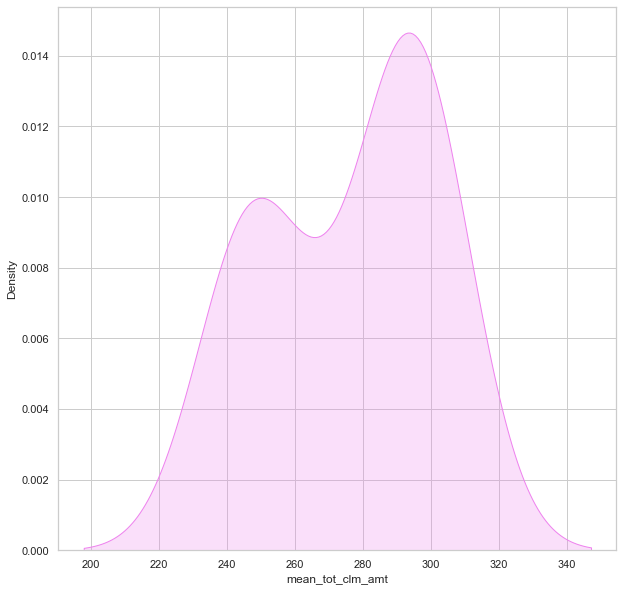

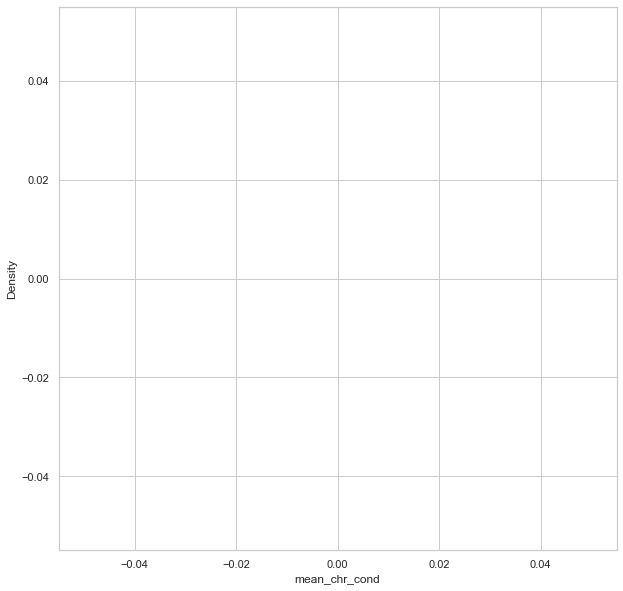

In [65]:
# Outpatient dataset density plots

col_list = ['Out_Claims', 'mean_age', 'mean_ins_amt_reim','mean_diag_cde',\
           'mean_proc_cde', 'mean_clm_dur', 'mean_tot_clm_amt','mean_chr_cond']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = out_doctors[col]
    sns.kdeplot(x, shade=True, color="violet")